In [6]:
#Installing a pacakge for creating connection strings to a remote database and another package for creating an enviroment to hide sensitive config info
%pip install pyodbc  
%pip install python-dotenv 
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\ofori\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\ofori\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\ofori\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\ofori\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\ofori\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\ofori\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## 1. Loading and Importing Packages

In [7]:
#Importing all the necessary packages
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


import warnings 
warnings.filterwarnings('ignore')

## 2. Load environment variables 

In [8]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

3. Get the values for the credients for SQL Server

In [9]:
# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

## 4. Connecting pyoddc library and connection string

In [10]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

## 5. Getting data from SQL Server using sql query

In [11]:
# Now use the sql query to get the data is what what you see below. 
#There was no permission to insert, delete or update the database.

query = 'SELECT * FROM LP2_Telco_churn_first_3000;'

data1 = pd.read_sql_query(query, connection)

6. Data Shape for SQL Data

In [12]:

data1.shape

(3000, 21)

6. Data Info for SQL Data

In [13]:
data1.info

<bound method DataFrame.info of               customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0             7590-VHVEG  Female          False     True       False       1   
1             5575-GNVDE    Male          False    False       False      34   
2             3668-QPYBK    Male          False    False       False       2   
3             7795-CFOCW    Male          False    False       False      45   
4             9237-HQITU  Female          False    False       False       2   
...                  ...     ...            ...      ...         ...     ...   
2995          2209-XADXF  Female          False    False       False       1   
2996          6620-JDYNW  Female          False    False       False      18   
2997          1891-FZYSA    Male           True     True       False      69   
2998          4770-UEZOX    Male          False    False       False       2   
2999  1A1:U3001038-RQOST    Male          False     True        True      19   

      P

7. Checking for Null values for SQL Data

In [14]:
#checking for null values
data1.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

7. Summary Statistics SQL Data

In [15]:
#Providing  summary statistics 
data1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,3000,3000,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,3000,2,Male,1537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,3000,2,False,2525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,3000,2,False,1538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,3000,2,False,2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,3000.0,NaN,NaN,NaN,32.527333,24.637768,0.0,9.0,29.0,56.0,72.0
PhoneService,3000,2,True,2731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,2731,2,False,1437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,3000,3,Fiber optic,1343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,2349,2,False,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


8. Check for duplicates in SQL Data

In [16]:
#checking for duplicated values
data1.duplicated().sum()

0

9. Check for duplicates in SQL Data

In [17]:
#calling for the duplicated value
data1[data1.duplicated(keep=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


10. Converting for sql data to .csv

In [18]:
#converting sql data to .csv
data1.to_csv('Telco_churn_first_3000.csv')

11. Installing and Importing excel(.xlsx) reader

In [19]:

# intstall and excel(.xlsx) reader
%pip install openpyxl
import openpyxl



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\ofori\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


12. Reading or Importing 2nd Dataset (.xlsx file)

In [20]:
# Read data Telco_2nd Data (.xlsx file)
data2 = pd.read_excel (r'C:\Users\ofori\OneDrive\Documents\AzubiAfricaData\LP2_Classification_Sojourn\Telco-churn-second-2000.xlsx')

13. Data Info for 2nd Dataset

In [21]:
data2.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7613-LLQFO    Male              0      No         No      12   
1     4568-TTZRT    Male              0      No         No       9   
2     9513-DXHDA    Male              0      No         No      27   
3     2640-PMGFL    Male              0      No        Yes      27   
4     3801-HMYNL    Male              0     Yes        Yes       1   
...          ...     ...            ...     ...        ...     ...   
1995  7912-SYRQT  Female              0      No         No       7   
1996  3557-HTYWR  Female              0      No         No      47   
1997  4816-JBHOV    Male              1      No         No       2   
1998  8920-NAVAY    Male              1      No         No      62   
1999  1699-TLDLZ  Female              0     Yes        Yes      16   

     PhoneService MultipleLines InternetService       OnlineSecurity  \
0             Yes           Yes     Fiber optic        

13. Check for null values in Dataset 2

In [22]:
#checking for null values
data2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

14. Convert Data2 from .csv to .xlsx

In [23]:
# Convert (data2) from .csv to .xlsx

# Replace 'input_file.csv' with the path to your CSV file
input_file = (r'C:\Users\ofori\OneDrive\Documents\AzubiAfricaData\LP2_Classification_Sojourn\Telco_churn_first_3000.csv')

# Replace 'output_file.xlsx' with the desired output file name
output_file = 'Telco_churn_first_3000.xlsx'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(input_file)

# Write the DataFrame to an Excel file
df.to_excel(output_file, index=False)

print(f'Data converted from {input_file} to {output_file}')


Data converted from C:\Users\ofori\OneDrive\Documents\AzubiAfricaData\LP2_Classification_Sojourn\Telco_churn_first_3000.csv to Telco_churn_first_3000.xlsx


15. Combining Telco_1st Data and Telco_2nd Data

In [24]:
#combine Telco_first and Telco_2nd data
datacombined2 = pd.concat([data1,data2])

16. Data Info for Combined Dataset (1 & 2)

In [25]:
datacombined2.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0    True      False       1   
1     5575-GNVDE    Male              0   False      False      34   
2     3668-QPYBK    Male              0   False      False       2   
3     7795-CFOCW    Male              0   False      False      45   
4     9237-HQITU  Female              0   False      False       2   
...          ...     ...            ...     ...        ...     ...   
1995  7912-SYRQT  Female              0      No         No       7   
1996  3557-HTYWR  Female              0      No         No      47   
1997  4816-JBHOV    Male              1      No         No       2   
1998  8920-NAVAY    Male              1      No         No      62   
1999  1699-TLDLZ  Female              0     Yes        Yes      16   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
0           False          None             DSL   

16. Checking for null values in combined dataset (1 & 2)

In [26]:
#checking for null values
datacombined2.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           5
Churn               2001
dtype: int64

17. Checking for duplicated values in combined dataset (1 & 2)

In [27]:
#checking for duplicated values
datacombined2.duplicated().sum()

0

Reading combined datacombined2 to excel

In [28]:
dataframe = pd.DataFrame(datacombined2)



In [29]:
# Replace 'output_file.xlsx' with the desired name for your Excel file
excel_file_path = 'churndata.xlsx'

# Save the DataFrame to an Excel file
dataframe.to_excel(excel_file_path, index=False)

print(f'DataFrame successfully saved to Excel file at: {excel_file_path}')

DataFrame successfully saved to Excel file at: churndata.xlsx


Converting combined data2 to .csv

In [30]:
import pandas as pd

# Replace 'your_input_file.xlsx' with the path to your Excel file
input_excel_file = r'C:\Users\ofori\OneDrive\Documents\AzubiAfricaData\LP2_Classification_Sojourn\churndata.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(input_excel_file)

# Replace 'your_output_file.csv' with the desired name for your CSV file
output_csv_file = 'churn_data.csv'

# Save the DataFrame to a CSV file
df.to_csv(output_csv_file, index=False)

print(f'Conversion complete. CSV file saved at: {output_csv_file}')


Conversion complete. CSV file saved at: churn_data.csv


Load Data

In [31]:
df = pd.read_csv('churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85000038146973,0.0
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,0.0
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,1.0
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,0.0
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.6499938964844,1.0


Dropping Column 0 (Customer ID)

In [32]:
del df['customerID']

Checking for Duplicate

In [33]:
df.duplicated().sum()

10

In [34]:
df.drop_duplicates(inplace=True)

Rechecking duplicates

In [35]:
df.duplicated().sum()

0

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4990 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4990 non-null   object 
 1   SeniorCitizen     4990 non-null   int64  
 2   Partner           4990 non-null   object 
 3   Dependents        4990 non-null   object 
 4   tenure            4990 non-null   int64  
 5   PhoneService      4990 non-null   object 
 6   MultipleLines     4721 non-null   object 
 7   InternetService   4990 non-null   object 
 8   OnlineSecurity    4344 non-null   object 
 9   OnlineBackup      4344 non-null   object 
 10  DeviceProtection  4344 non-null   object 
 11  TechSupport       4344 non-null   object 
 12  StreamingTV       4344 non-null   object 
 13  StreamingMovies   4344 non-null   object 
 14  Contract          4990 non-null   object 
 15  PaperlessBilling  4990 non-null   object 
 16  PaymentMethod     4990 non-null   object 
 17  

Checking for Missing Values or Null 

In [37]:
df.isna().sum()

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       646
OnlineBackup         646
DeviceProtection     646
TechSupport          646
StreamingTV          646
StreamingMovies      646
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           5
Churn               1998
dtype: int64

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,4990.0,0.159920,0.366568,0.00,0.000000,0.000000,0.00,1.00
tenure,4990.0,32.320240,24.620341,0.00,9.000000,29.000000,56.00,72.00
MonthlyCharges,4990.0,64.855972,30.117966,18.25,35.612499,70.449998,89.95,118.75
Churn,2992.0,0.259693,0.438539,0.00,0.000000,0.000000,1.00,1.00


In [39]:
df.describe(include='object').T

,count,unique,top,freq
gender,4990,2,Male,2526
Partner,4990,4,False,1531
Dependents,4990,4,False,2063
PhoneService,4990,4,True,2724
MultipleLines,4721,5,False,1430
InternetService,4990,3,Fiber optic,2190
OnlineSecurity,4344,5,False,1476
OnlineBackup,4344,5,False,1318
DeviceProtection,4344,5,False,1294
TechSupport,4344,5,False,1474


## Univariate Analysis

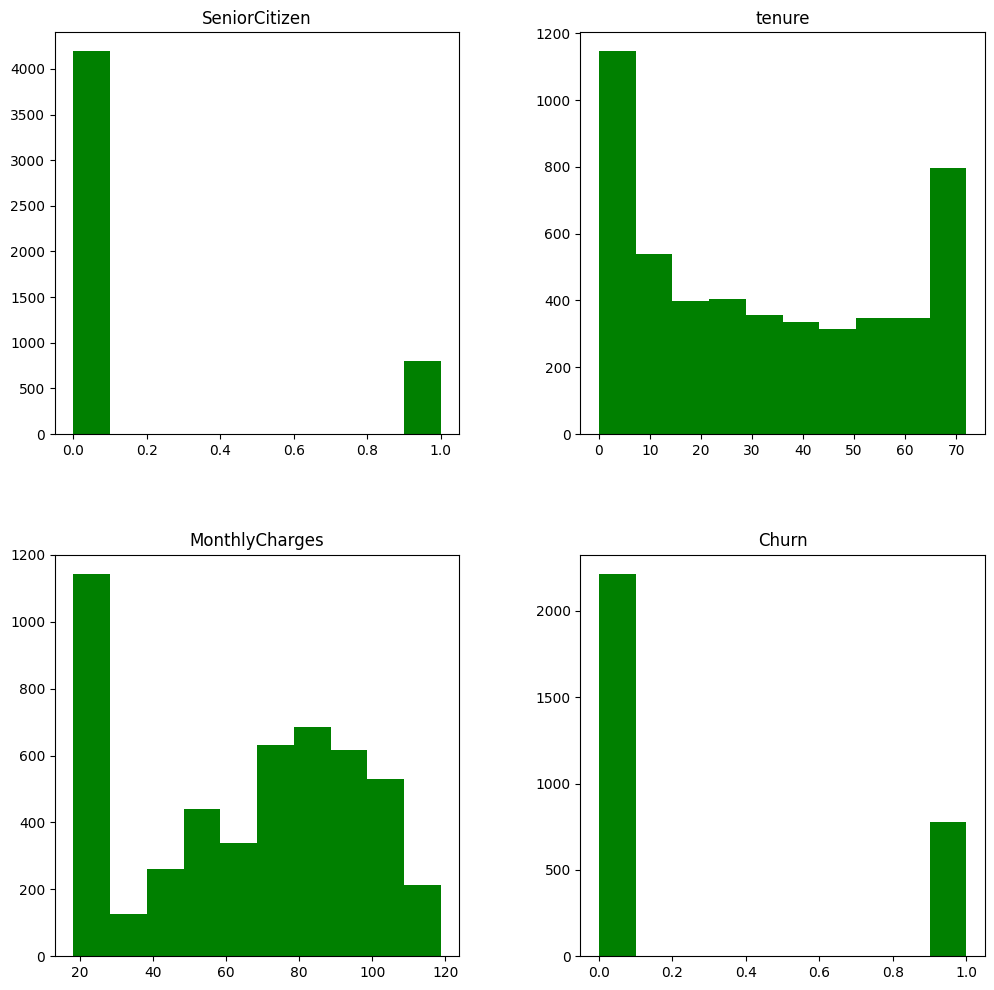

In [40]:
df.hist(figsize=(12,12), grid = False, color = "green")
plt.show()

<Axes: >

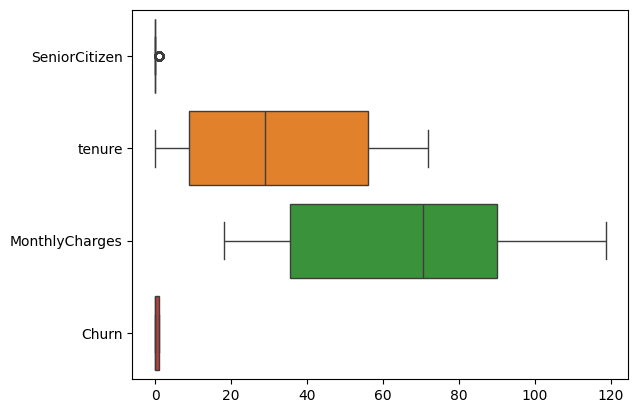

In [41]:
sns.boxplot(data=df,orient='h')

## Bi-variate Analysis

In [42]:
correlation = df.corr(numeric_only=True)
correlation

,SeniorCitizen,tenure,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.009182,0.219147,0.143183
tenure,0.009182,1.000000,0.242255,-0.349208
MonthlyCharges,0.219147,0.242255,1.000000,0.212979
Churn,0.143183,-0.349208,0.212979,1.000000


<Axes: >

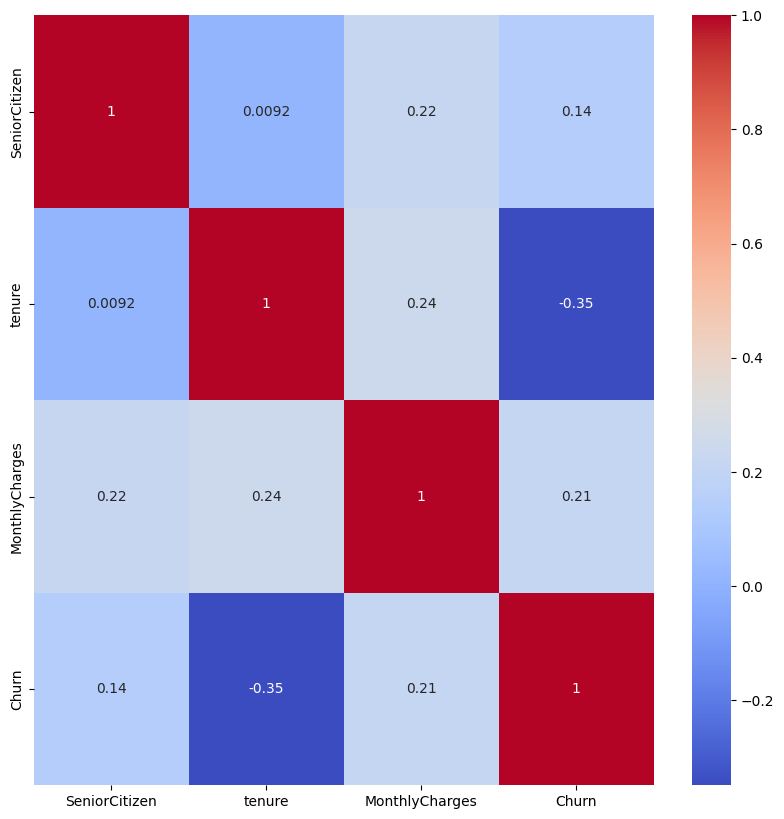

In [43]:
plt.figure(figsize = (10, 10))
sns.heatmap(data=correlation, annot=True, cmap='coolwarm')

## Multivariate Analyis


In [44]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [45]:
all_column_data_types = df.dtypes

df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn               float64
dtype: object

<Figure size 1500x700 with 0 Axes>

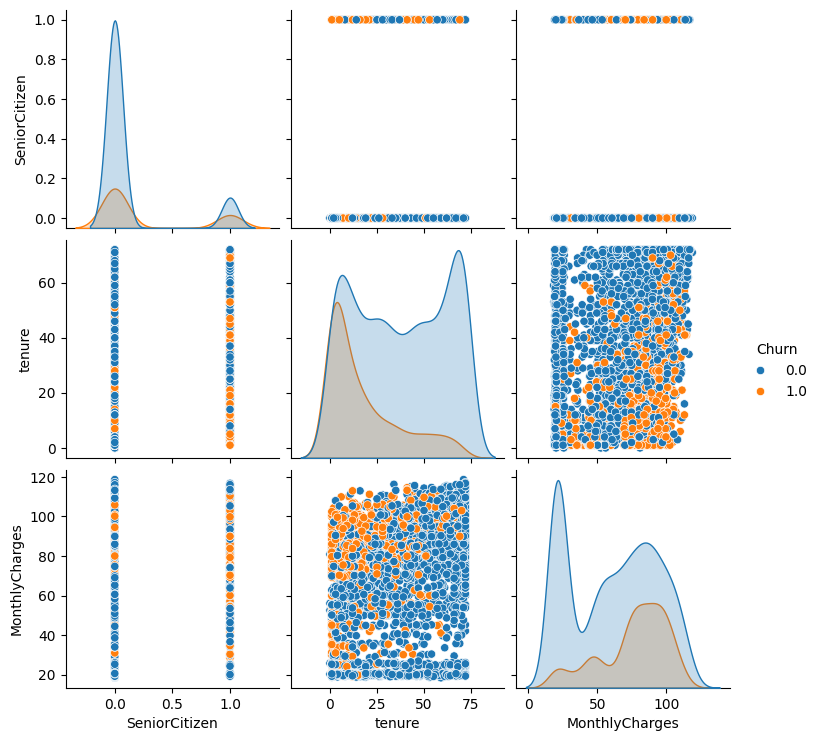

In [46]:
data = df[['SeniorCitizen','tenure','Churn','MonthlyCharges']]
plt.figure(figsize=(15,7))
sns.pairplot(data, hue = 'Churn')
plt.show()

<Figure size 1500x700 with 0 Axes>

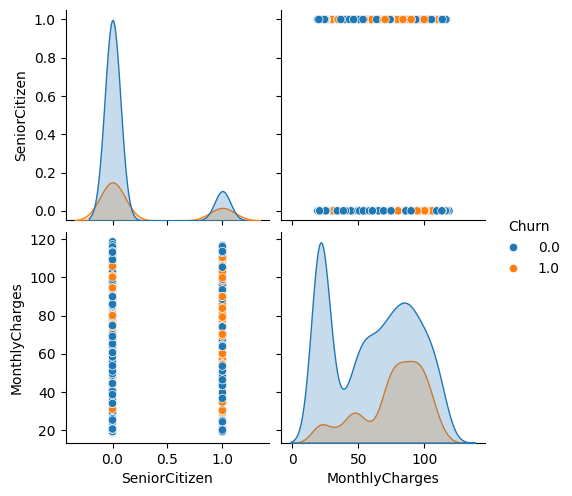

In [47]:
data = df[['SeniorCitizen','Churn','MonthlyCharges']]
plt.figure(figsize=(15,7))
sns.pairplot(data, hue = 'Churn')
plt.show()

## INSERT INFORMATION GRAPHS

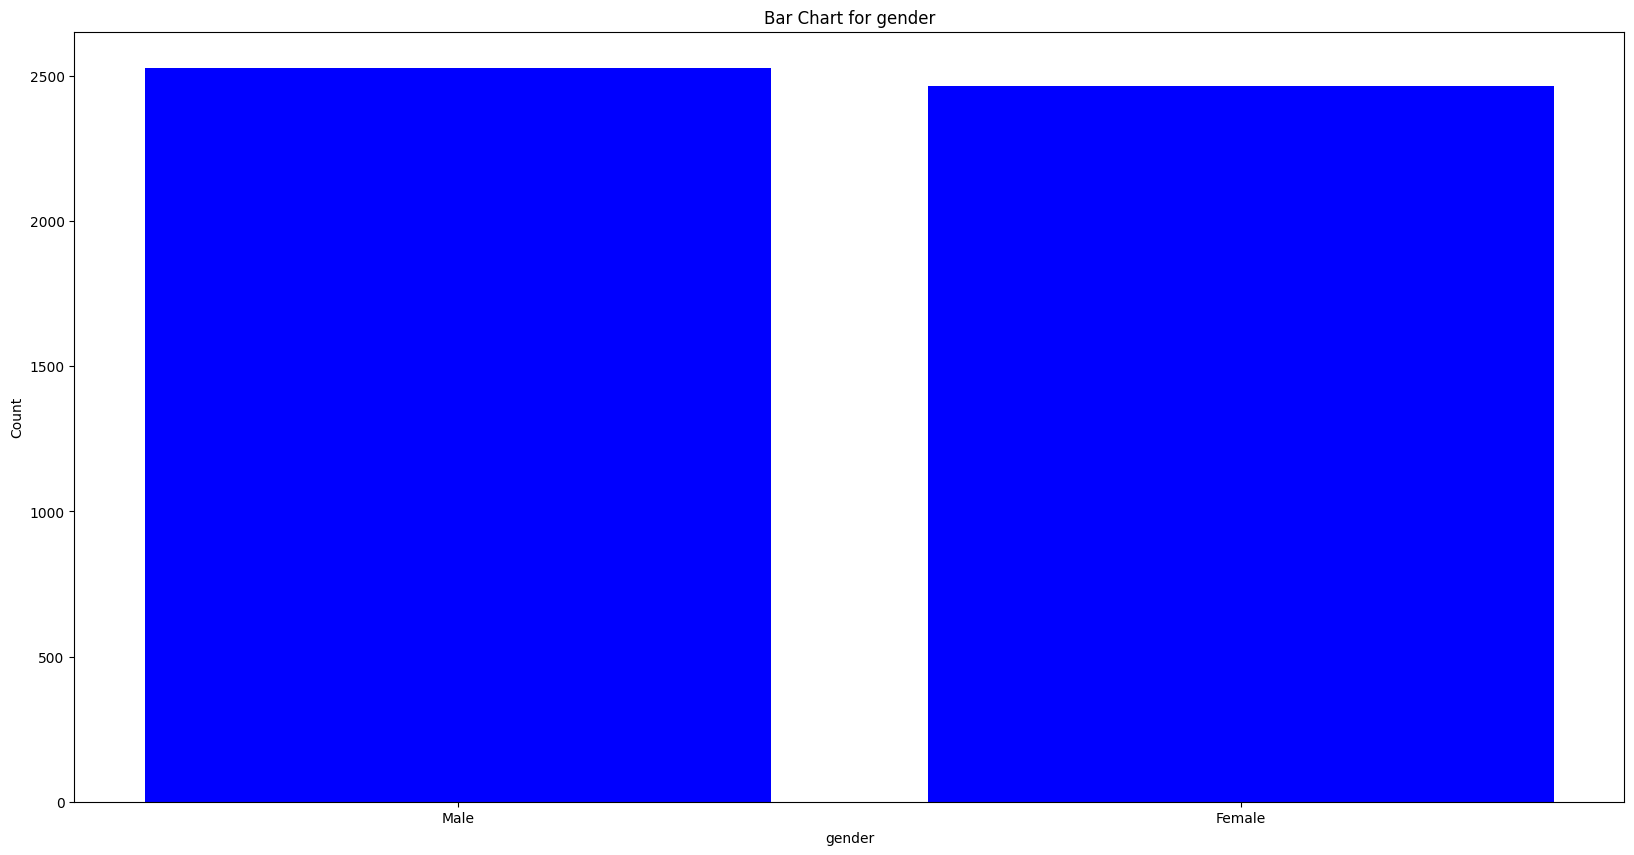

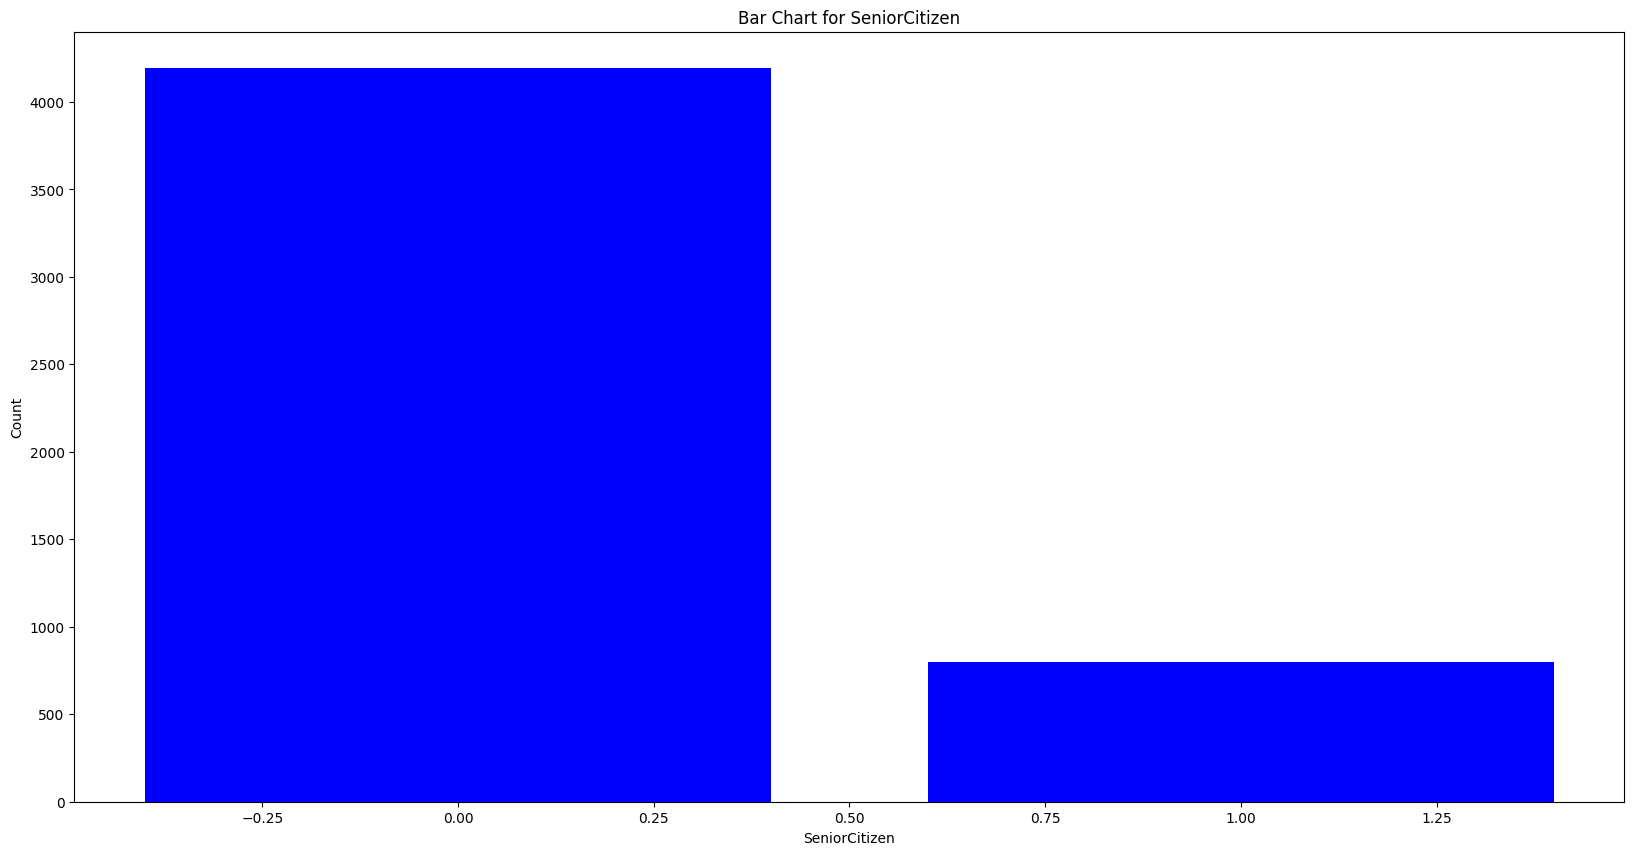

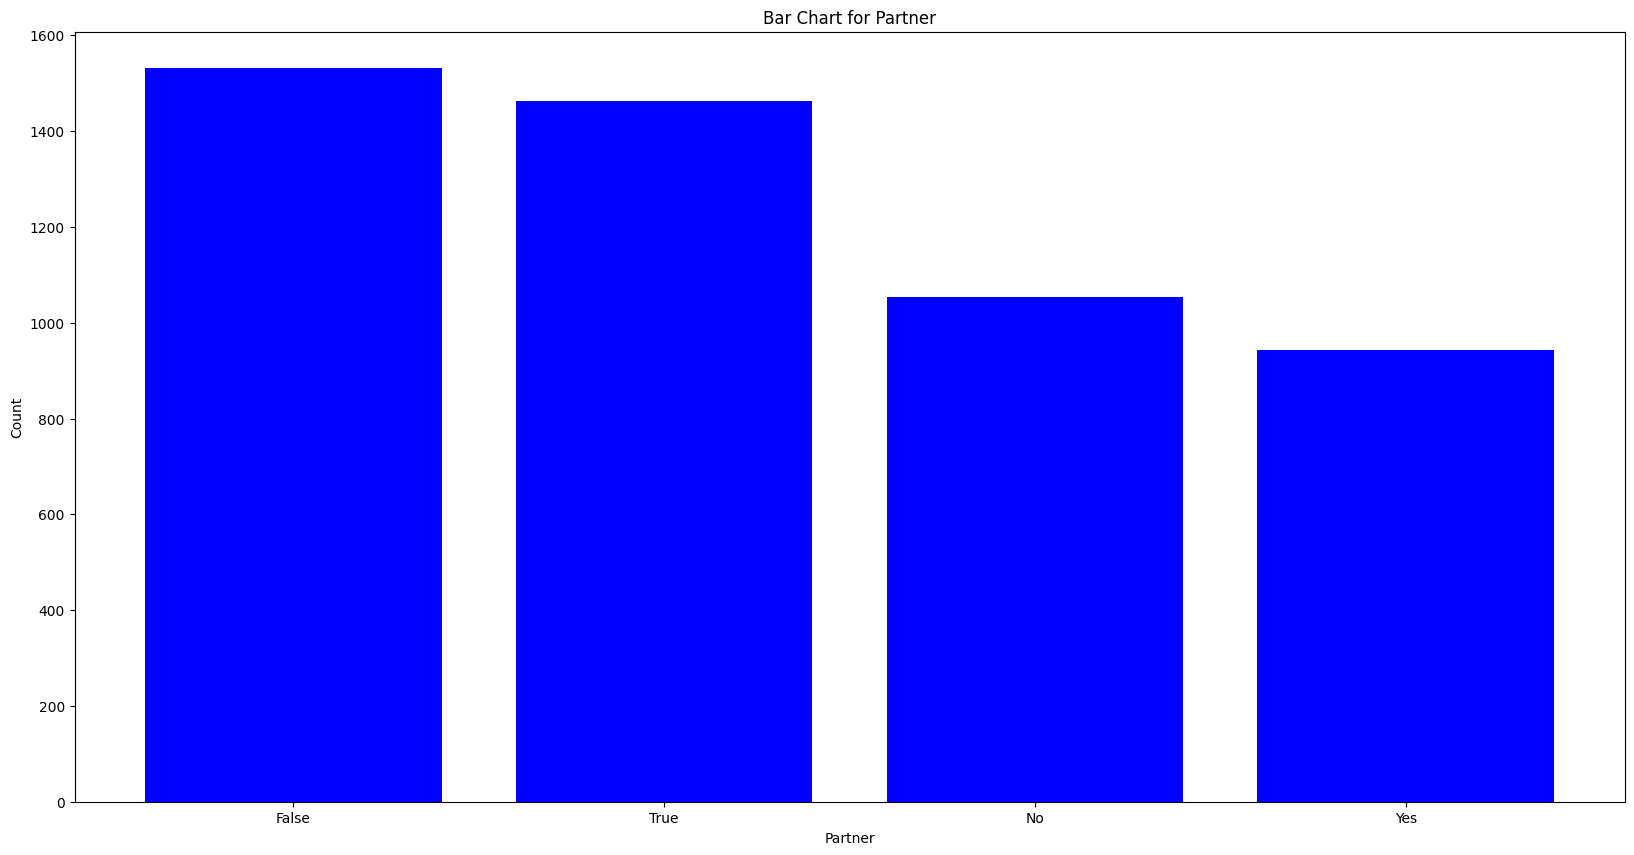

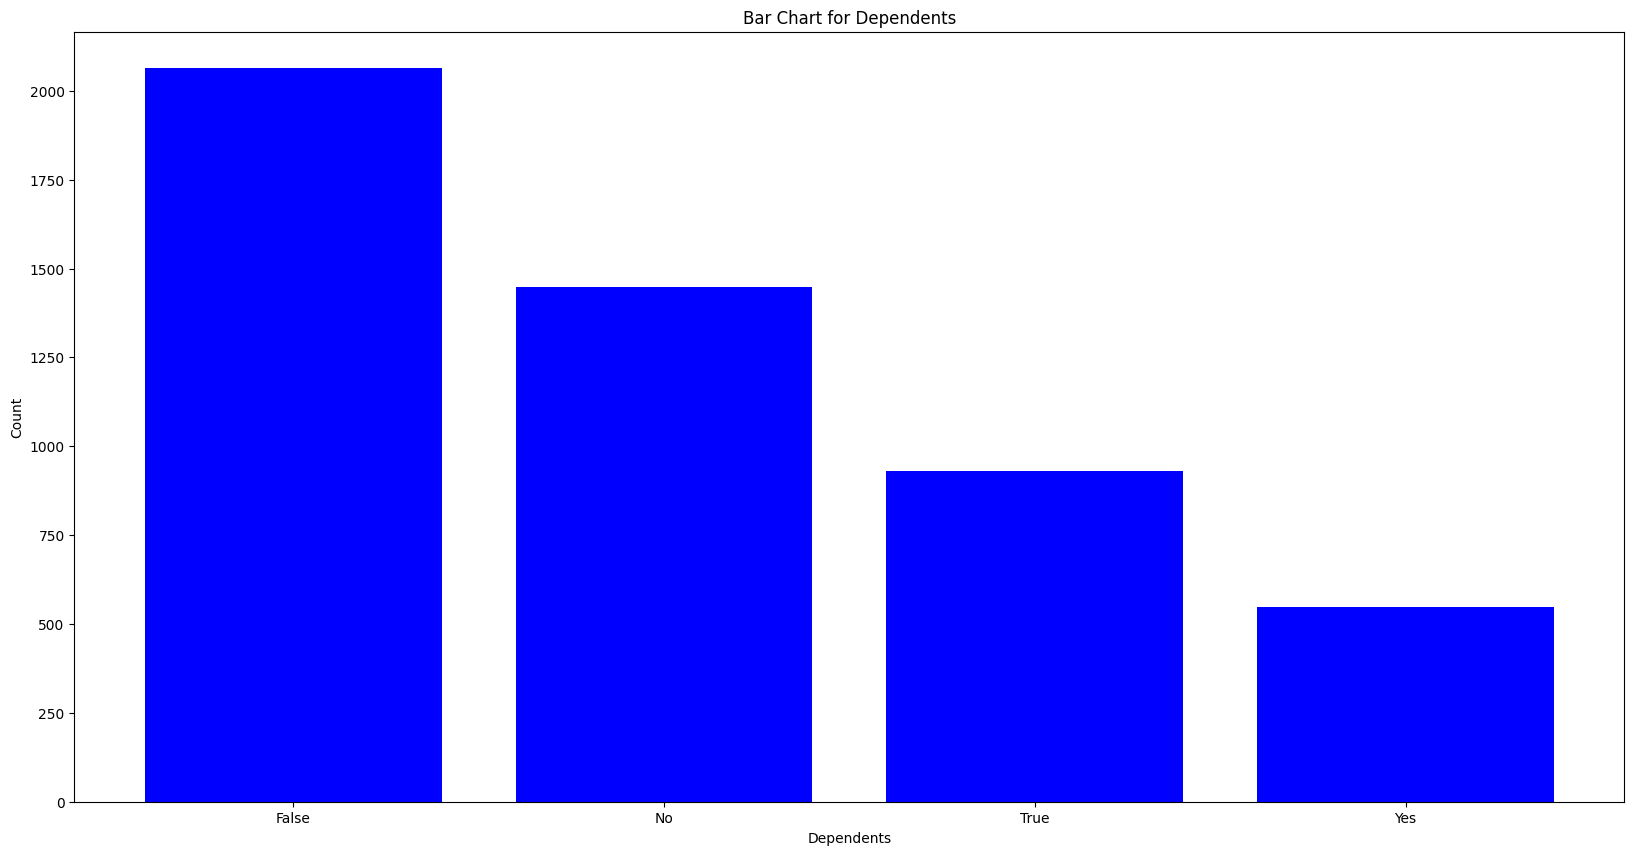

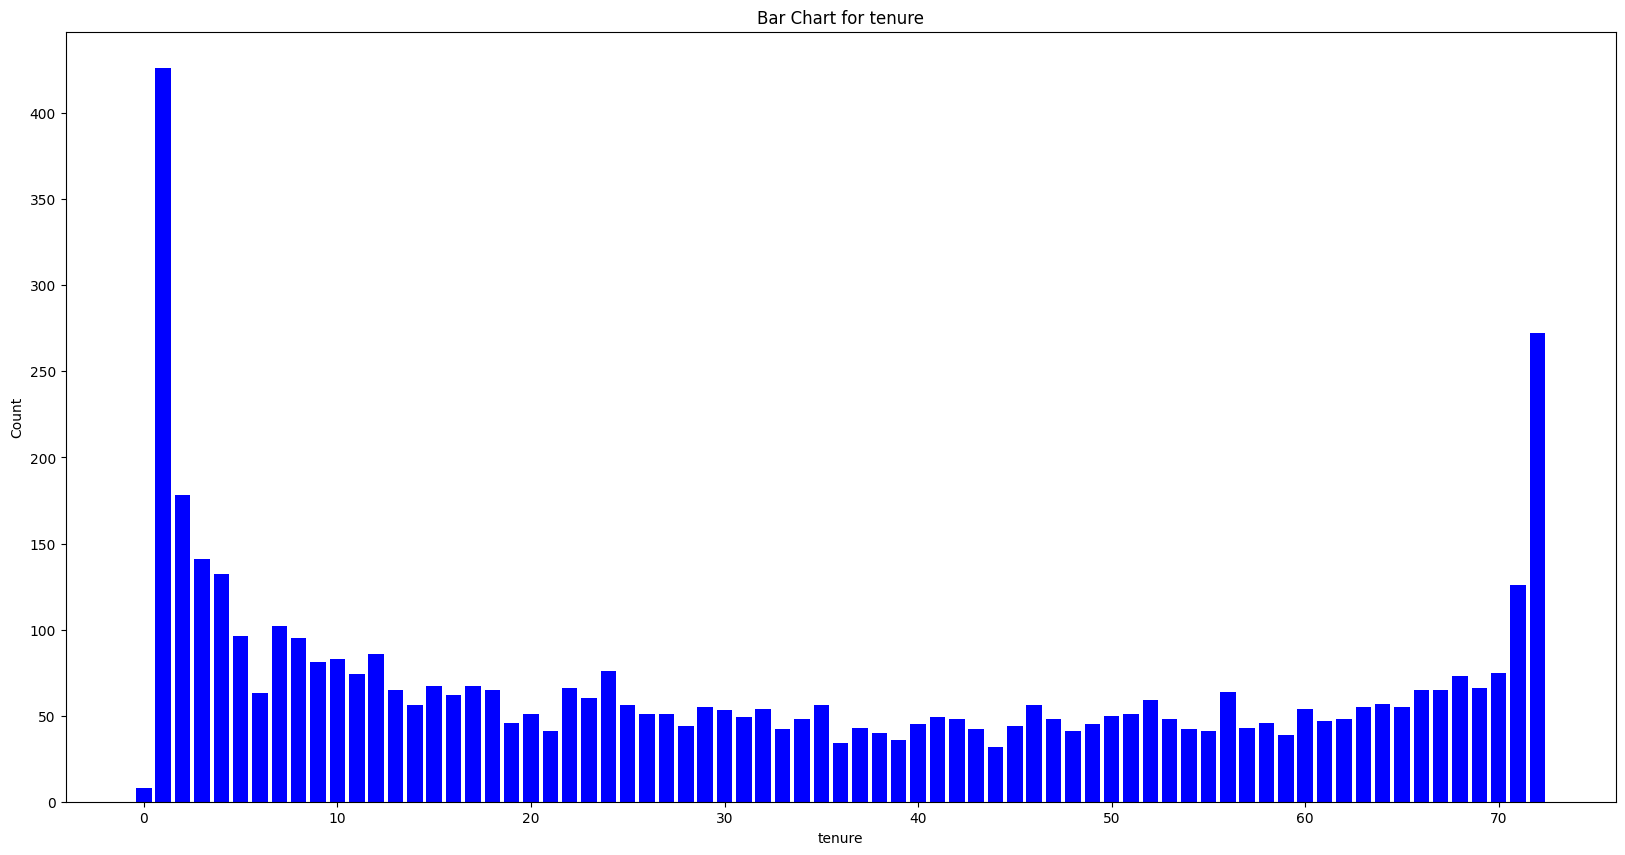

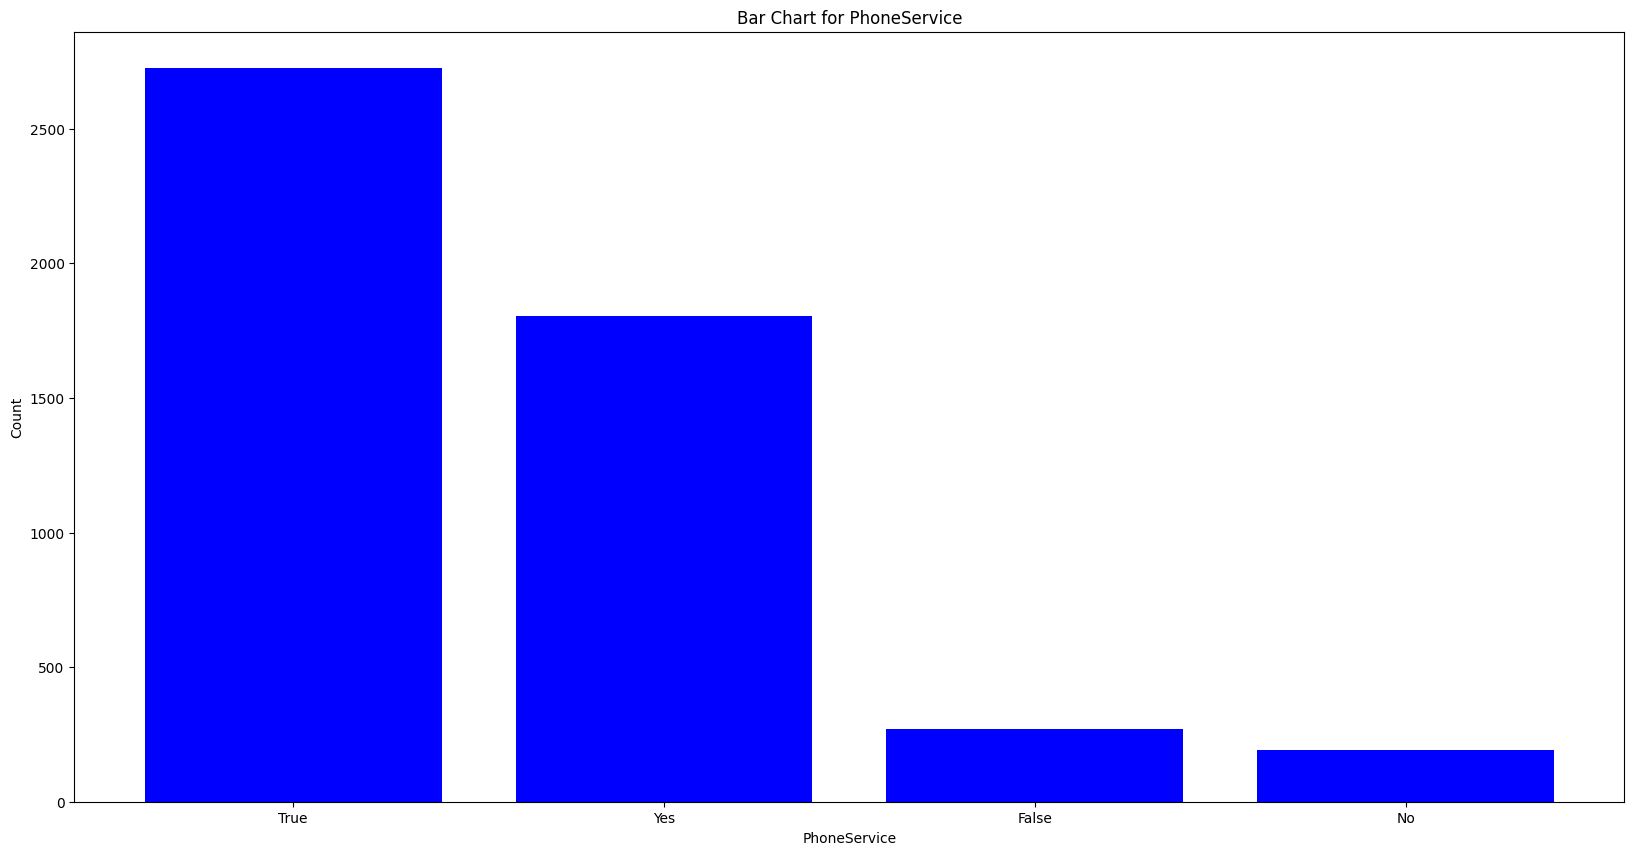

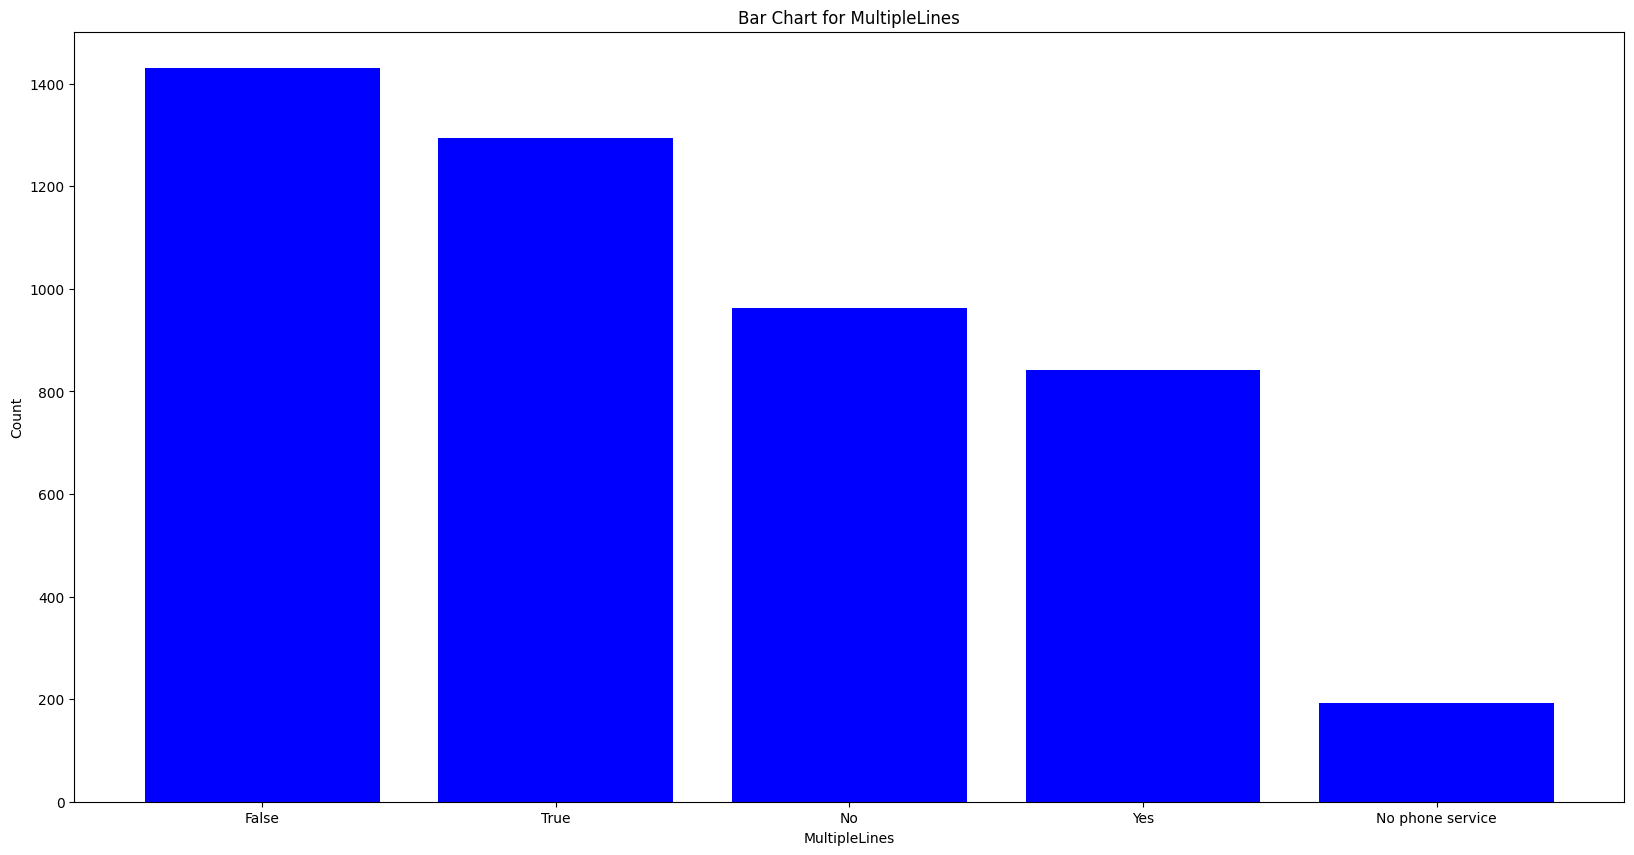

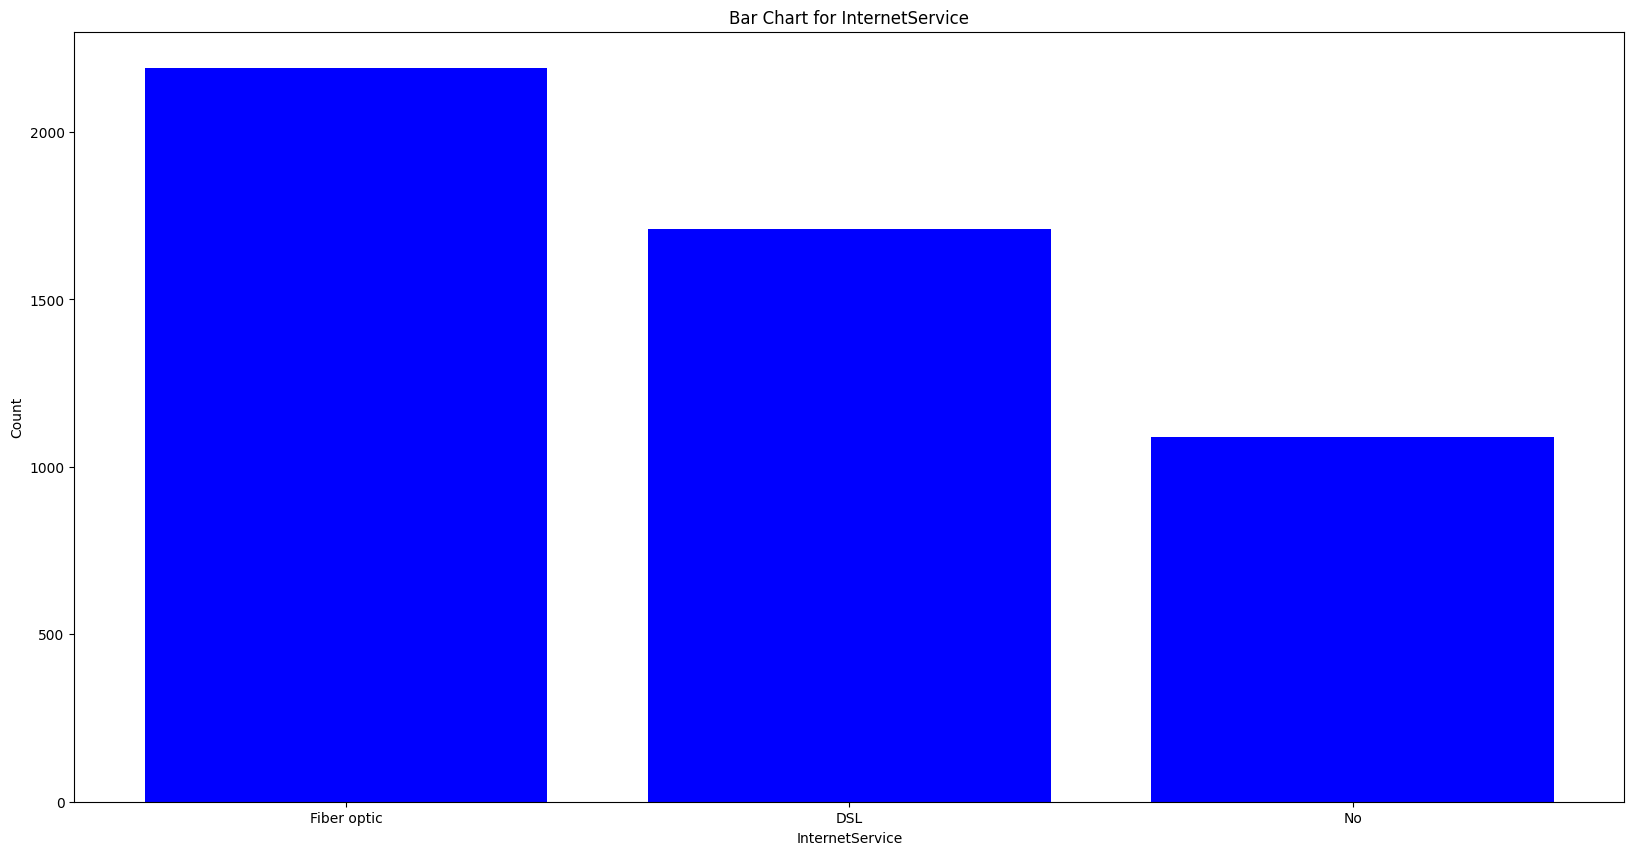

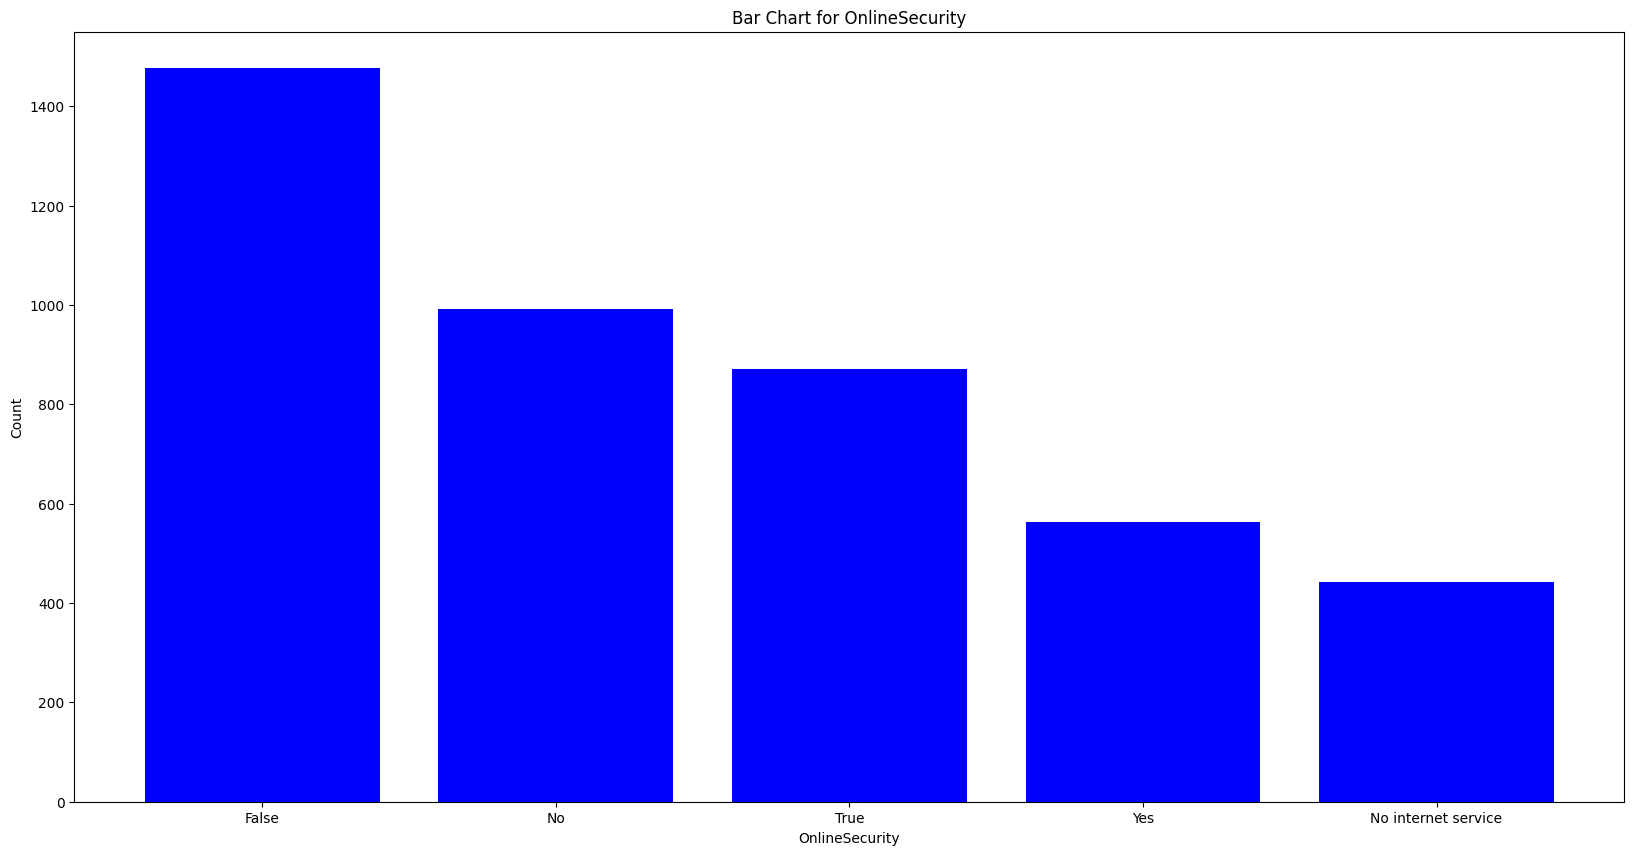

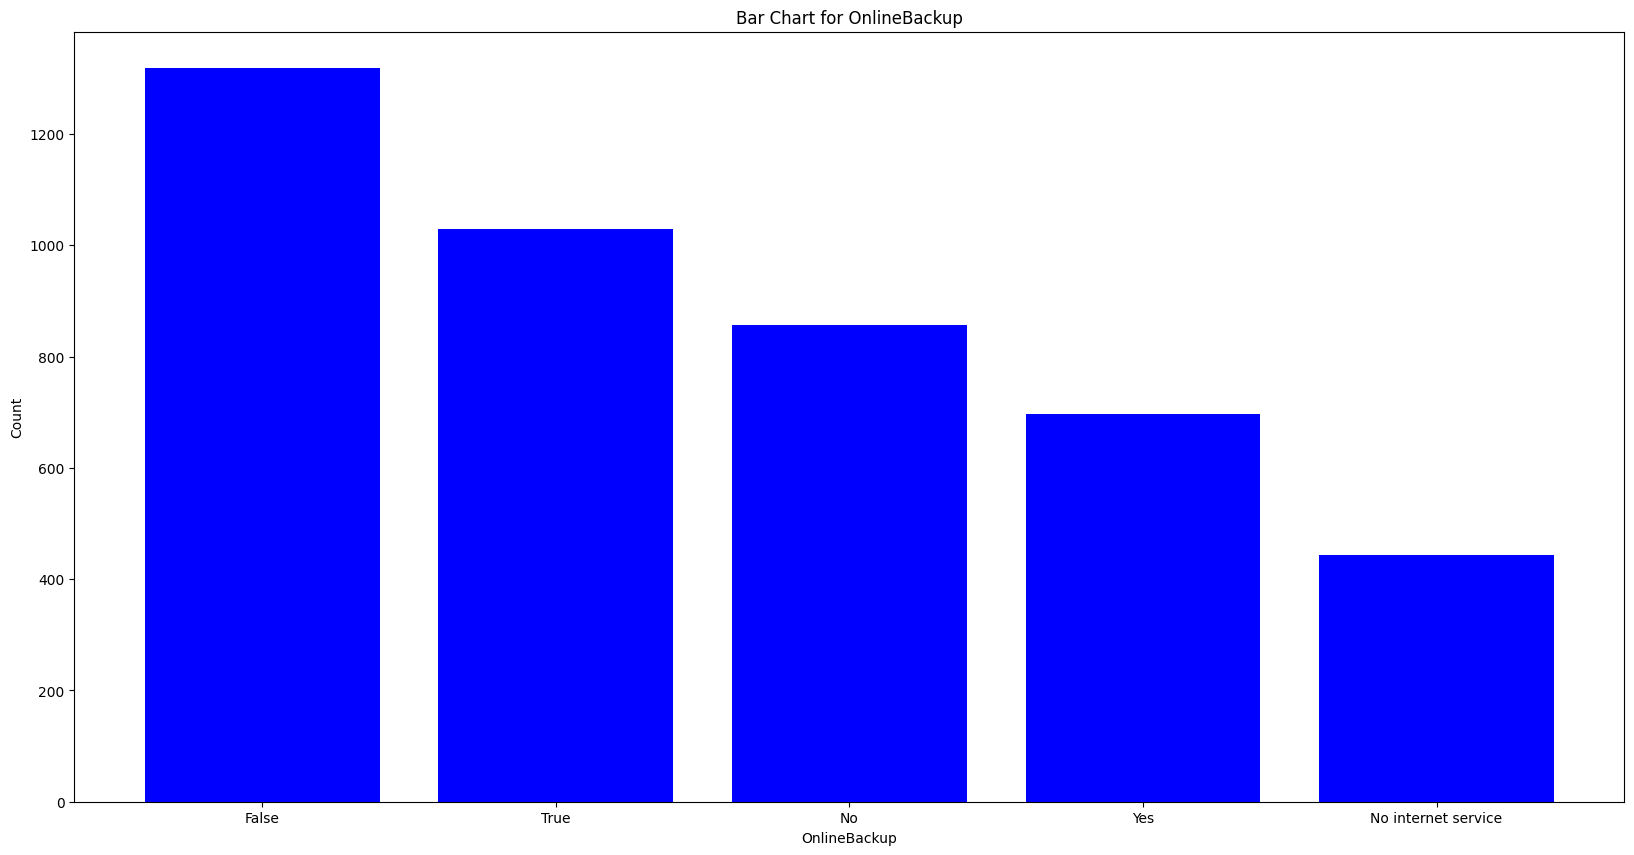

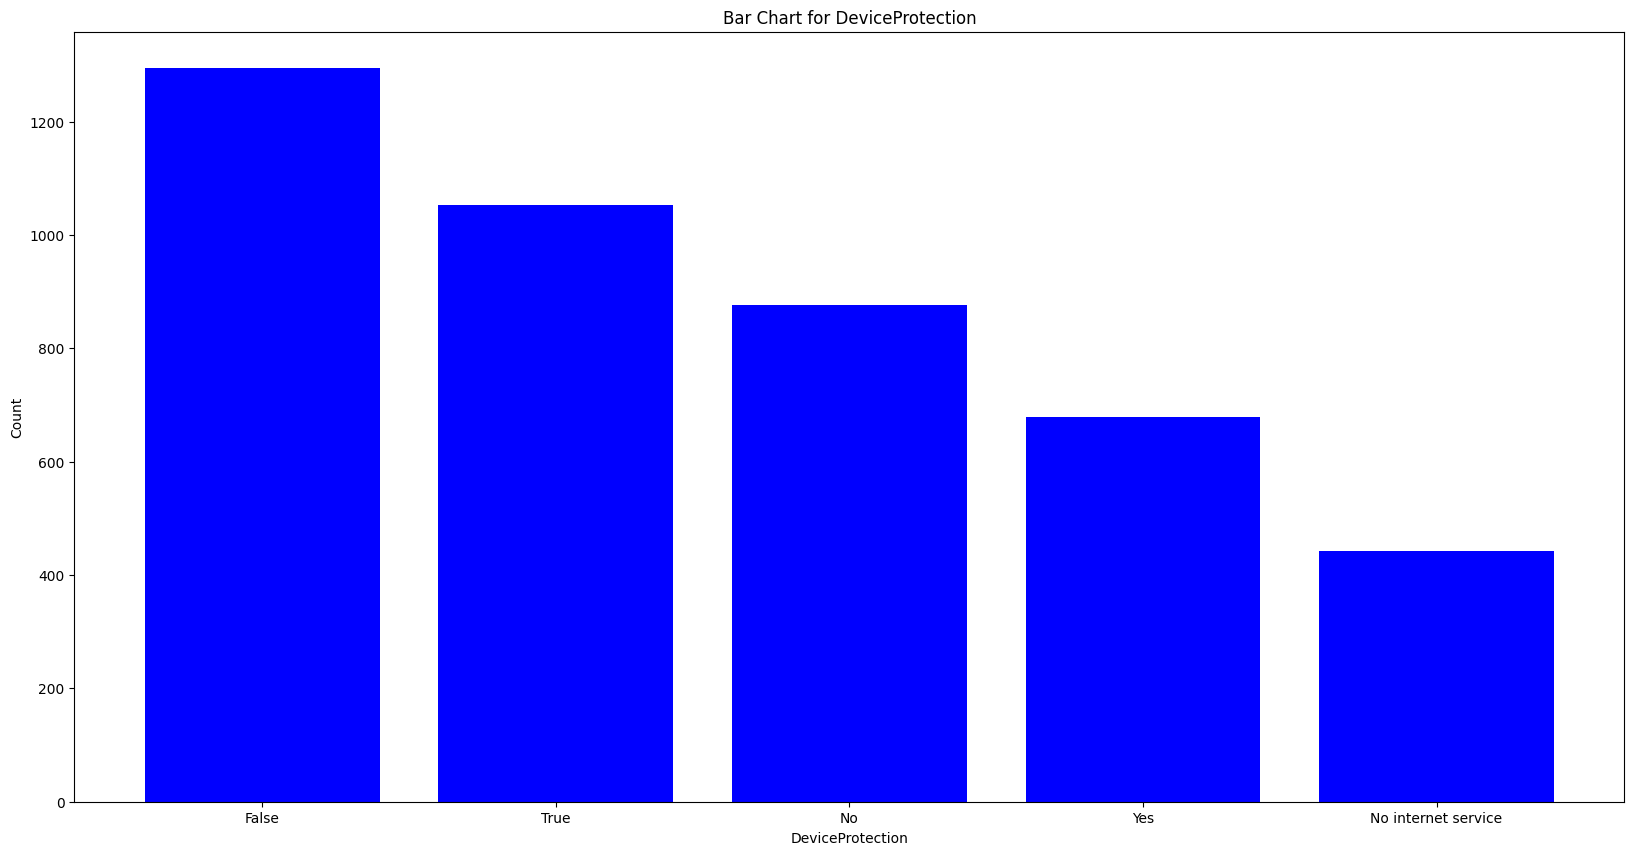

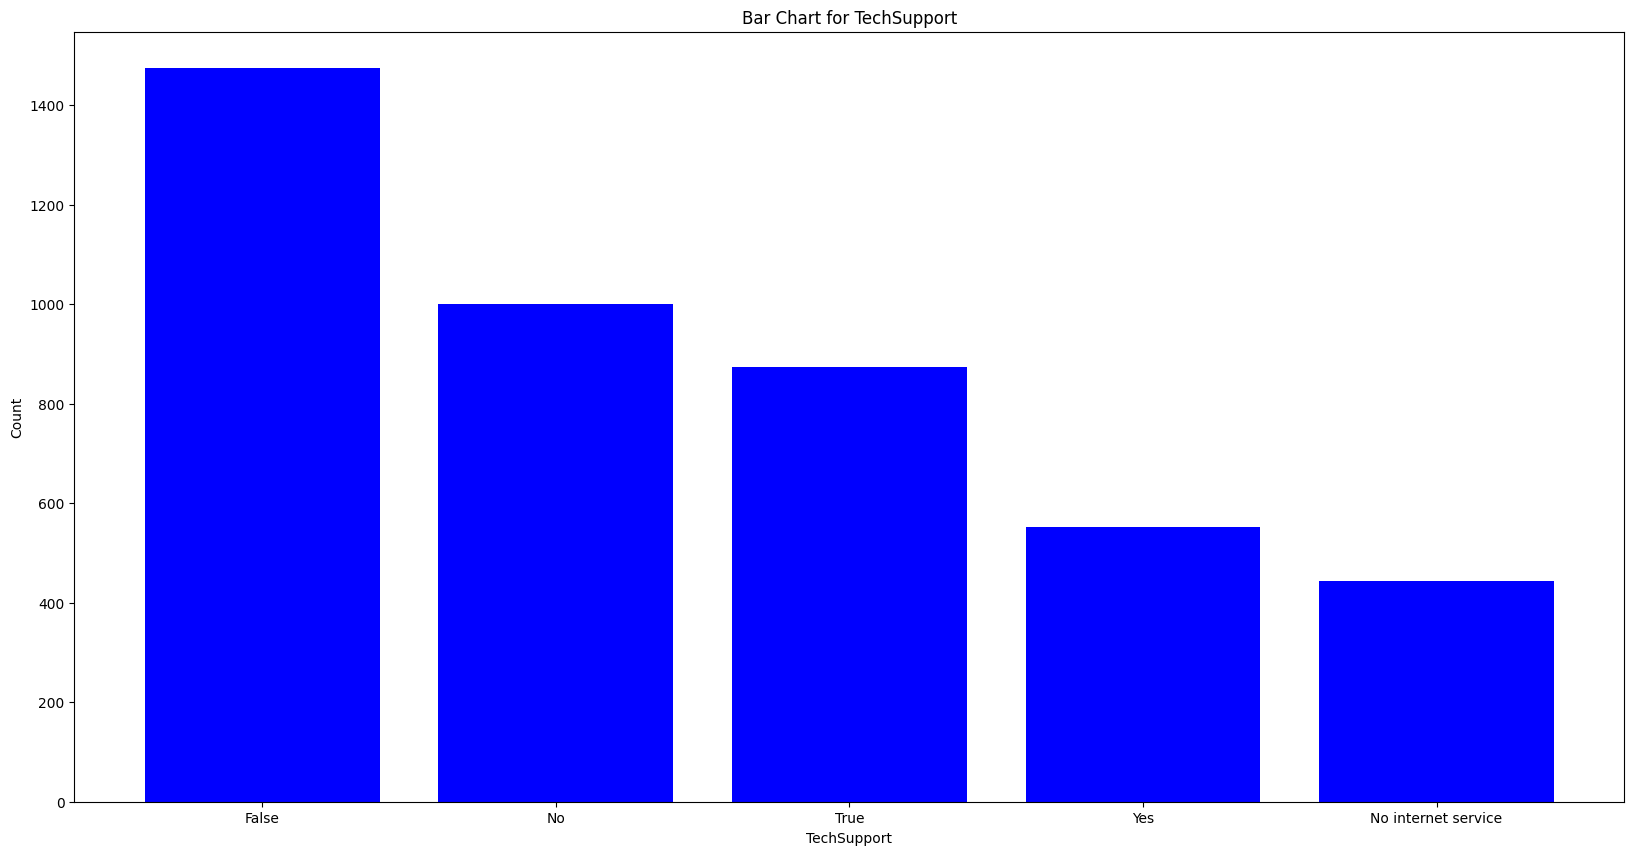

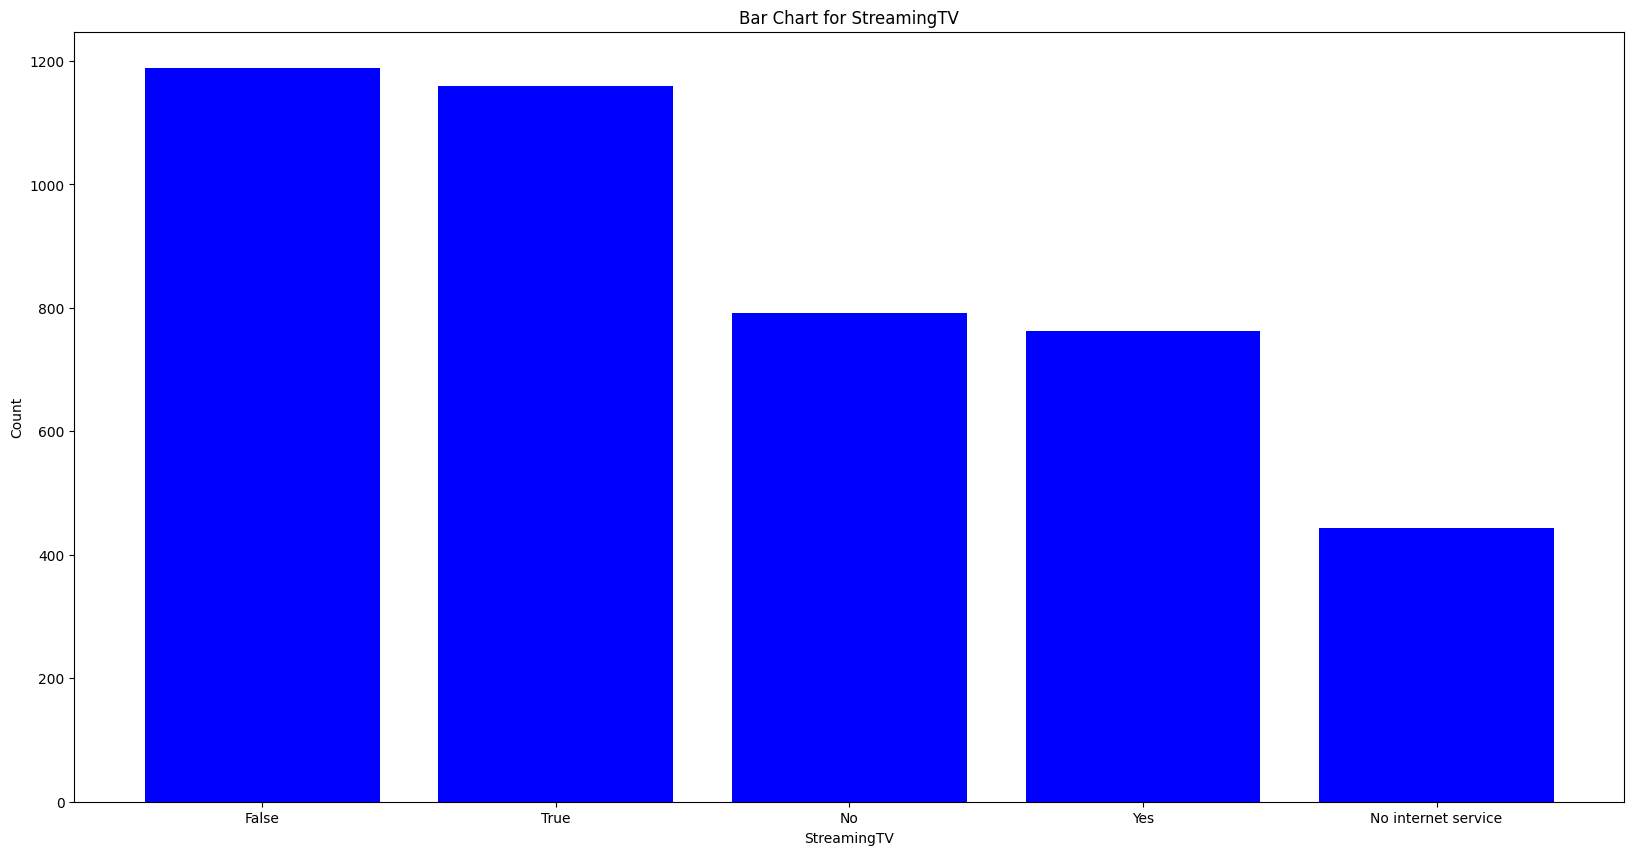

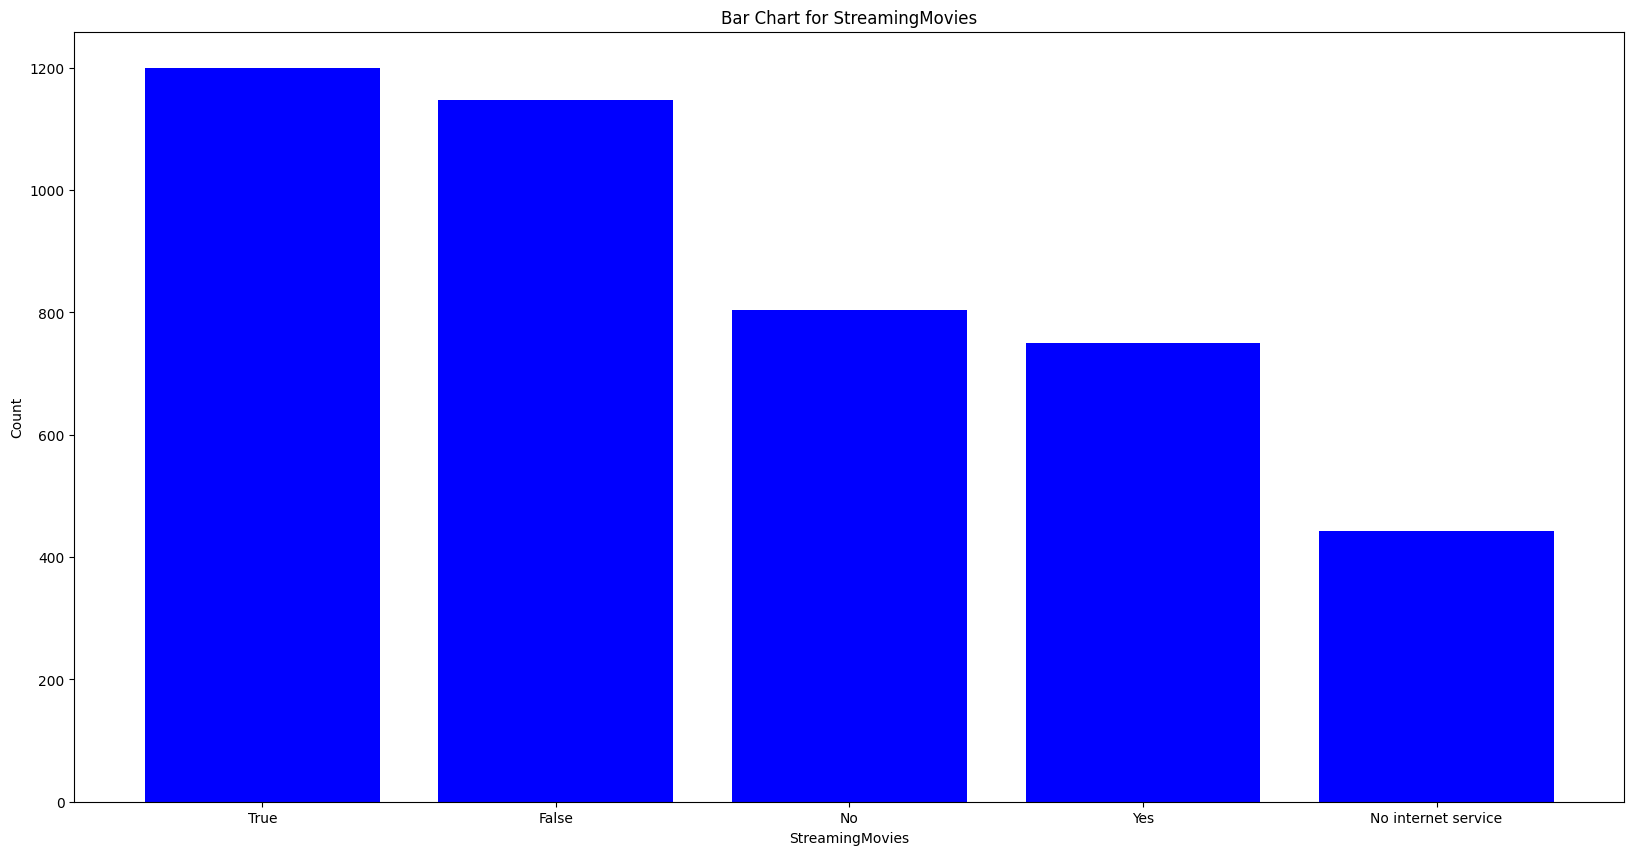

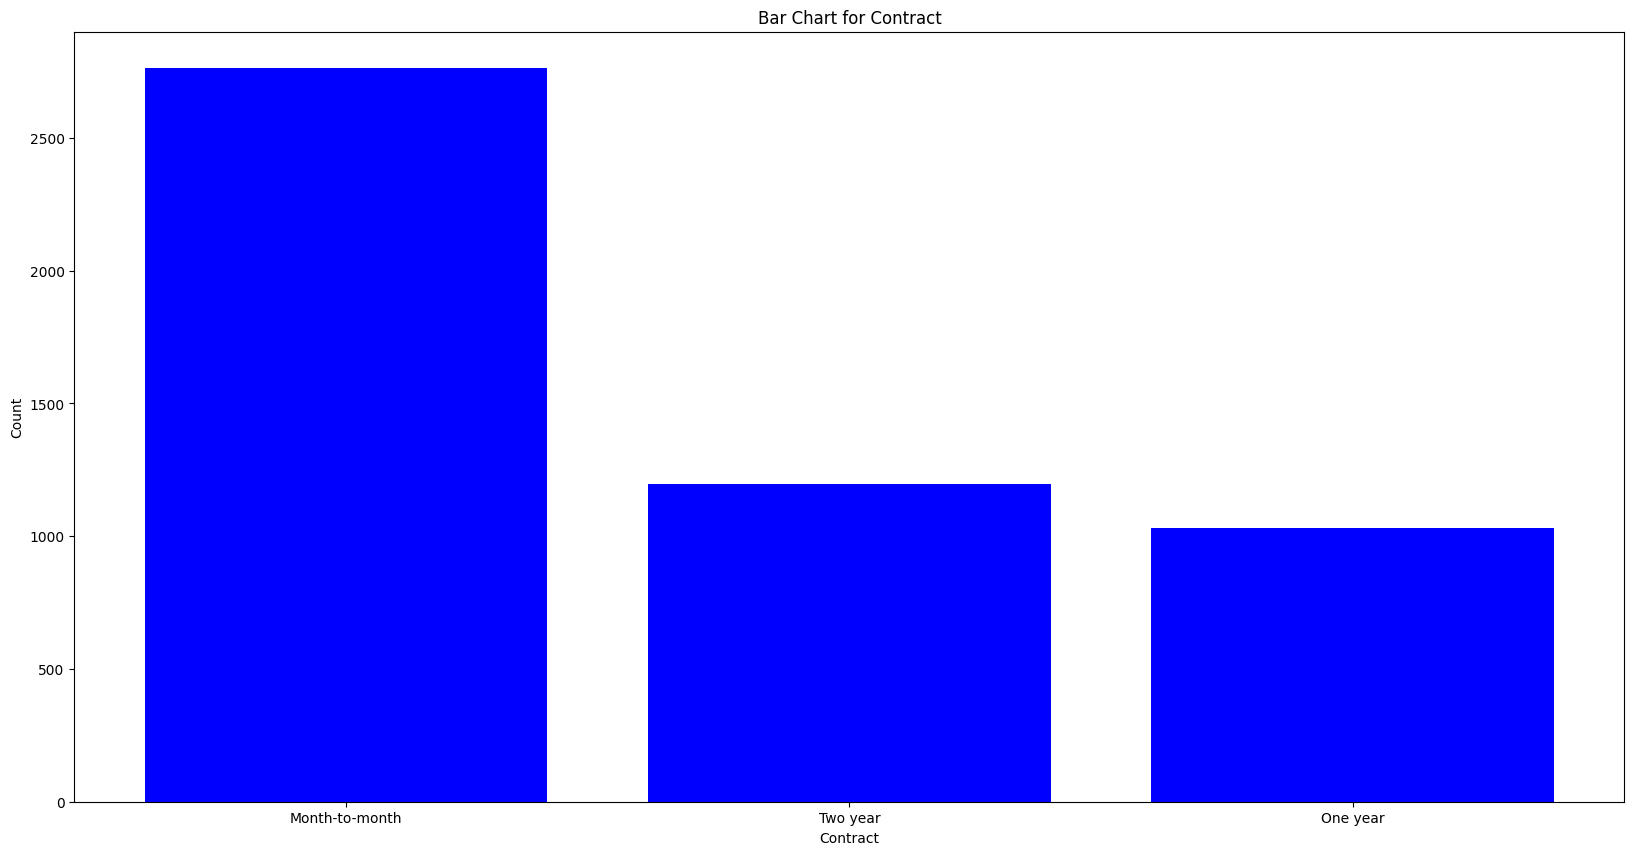

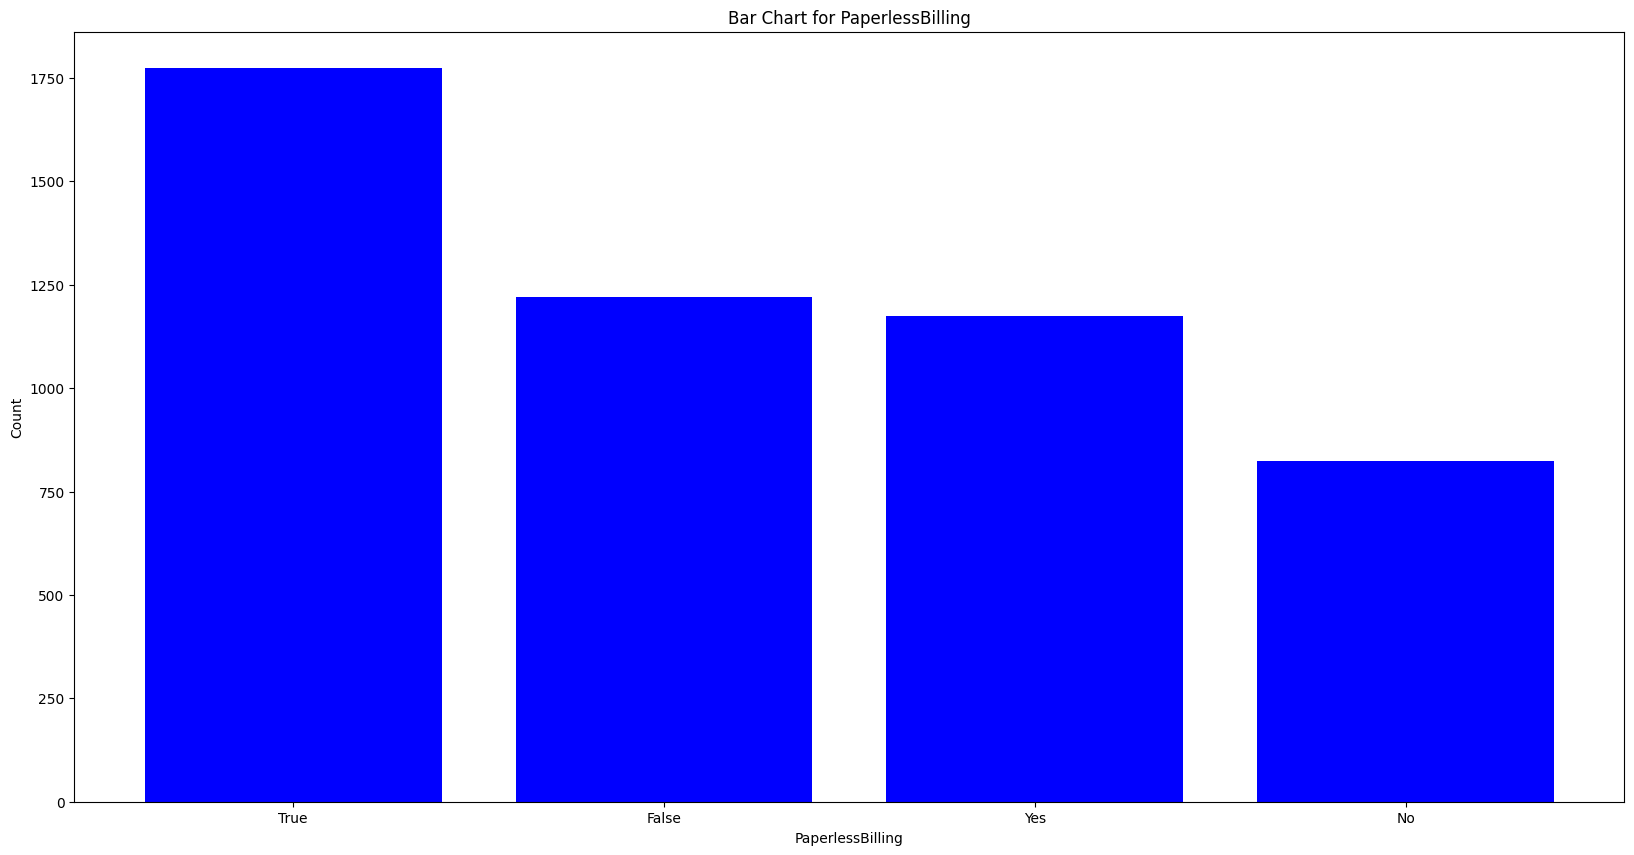

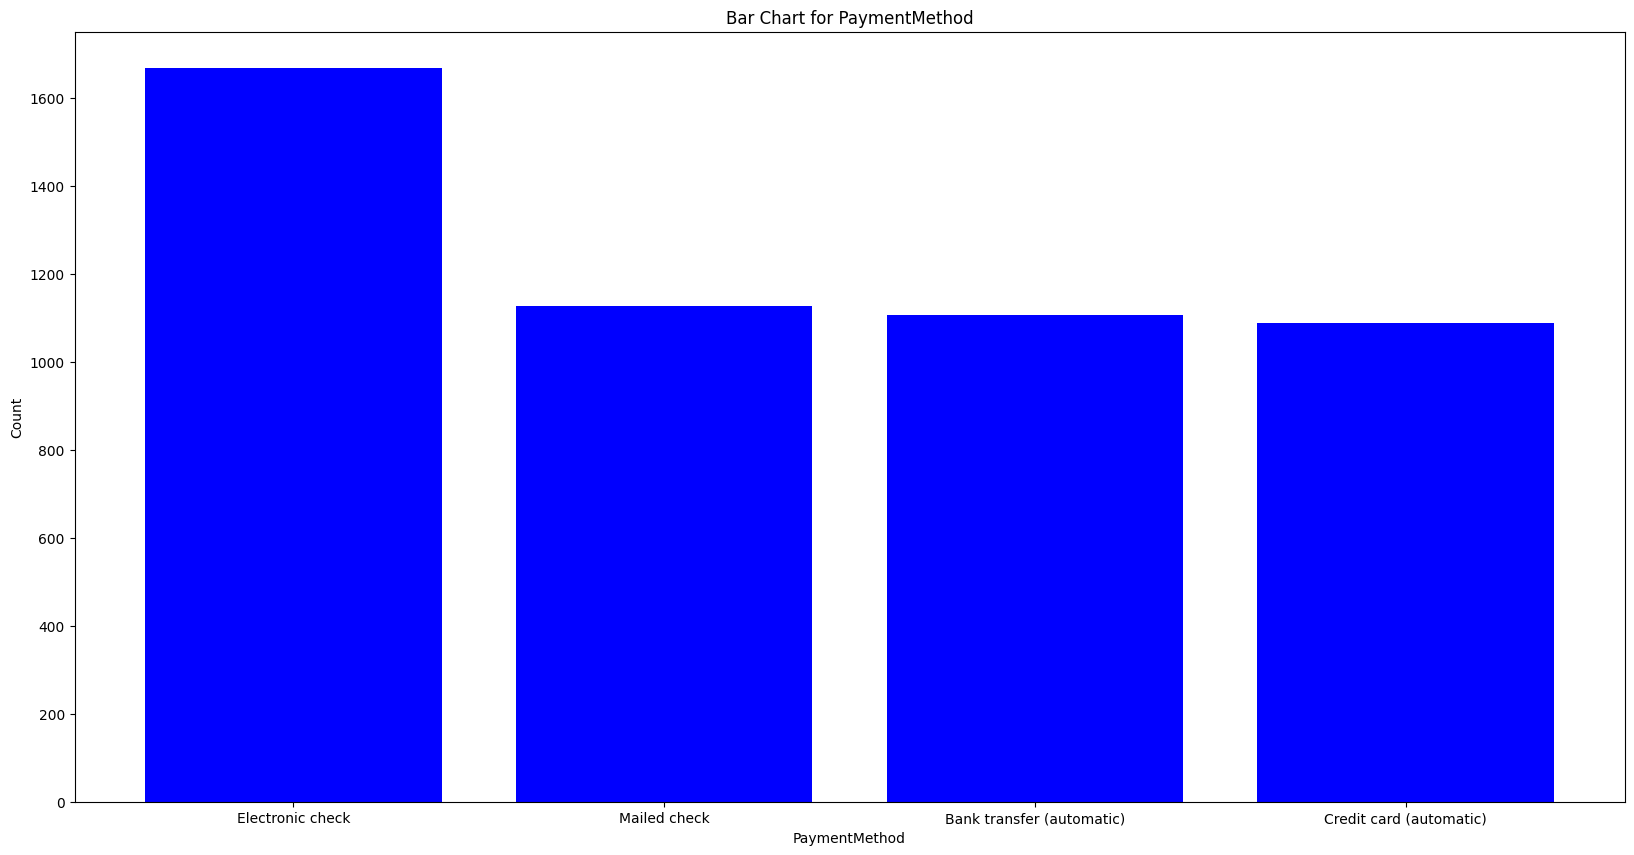

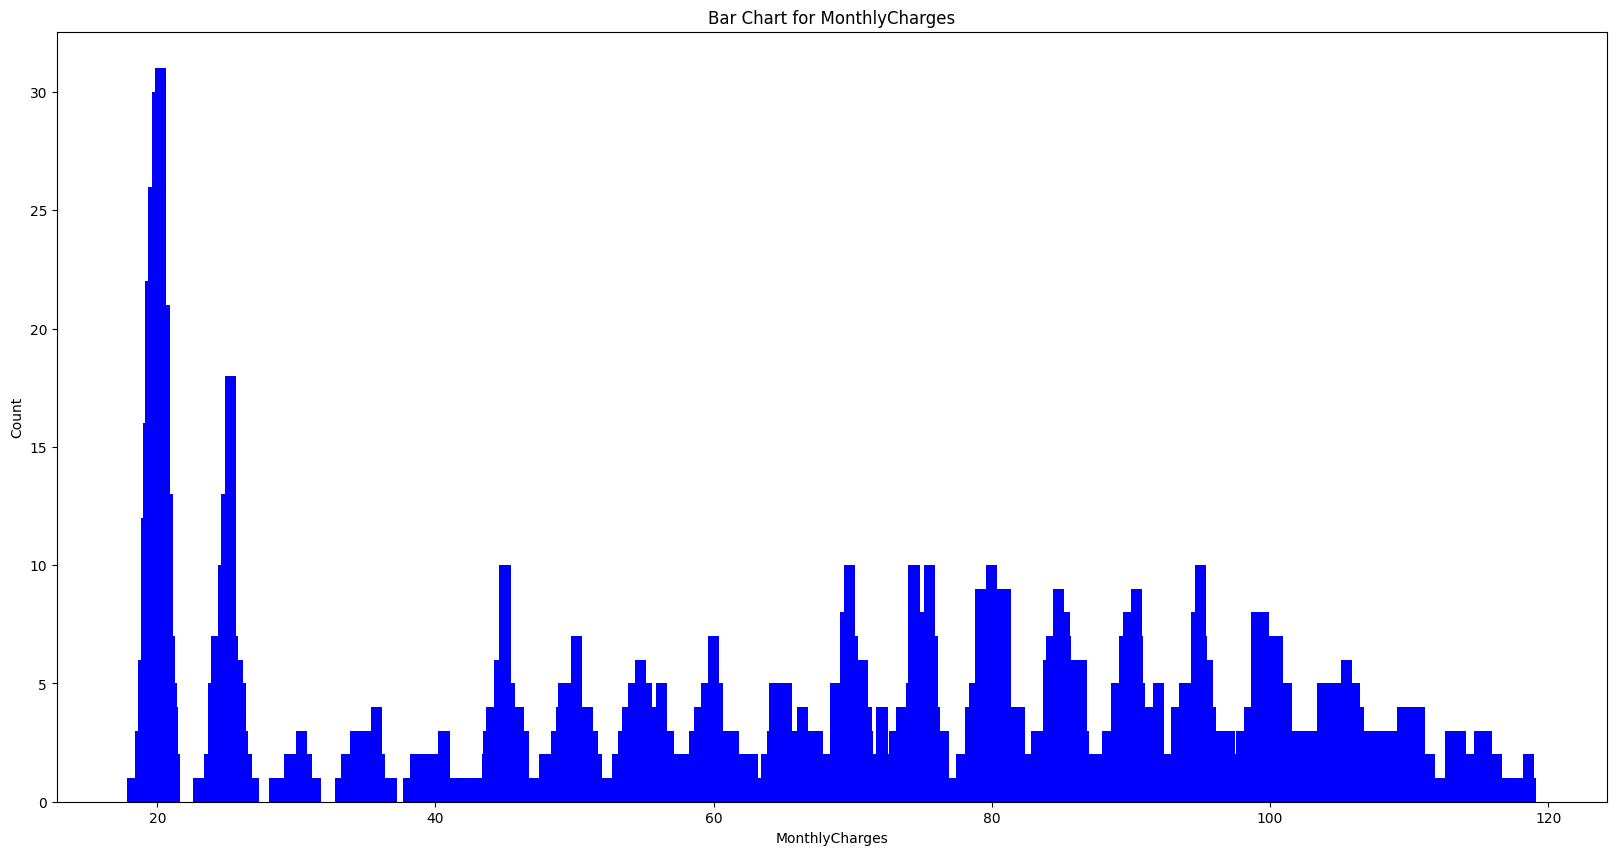

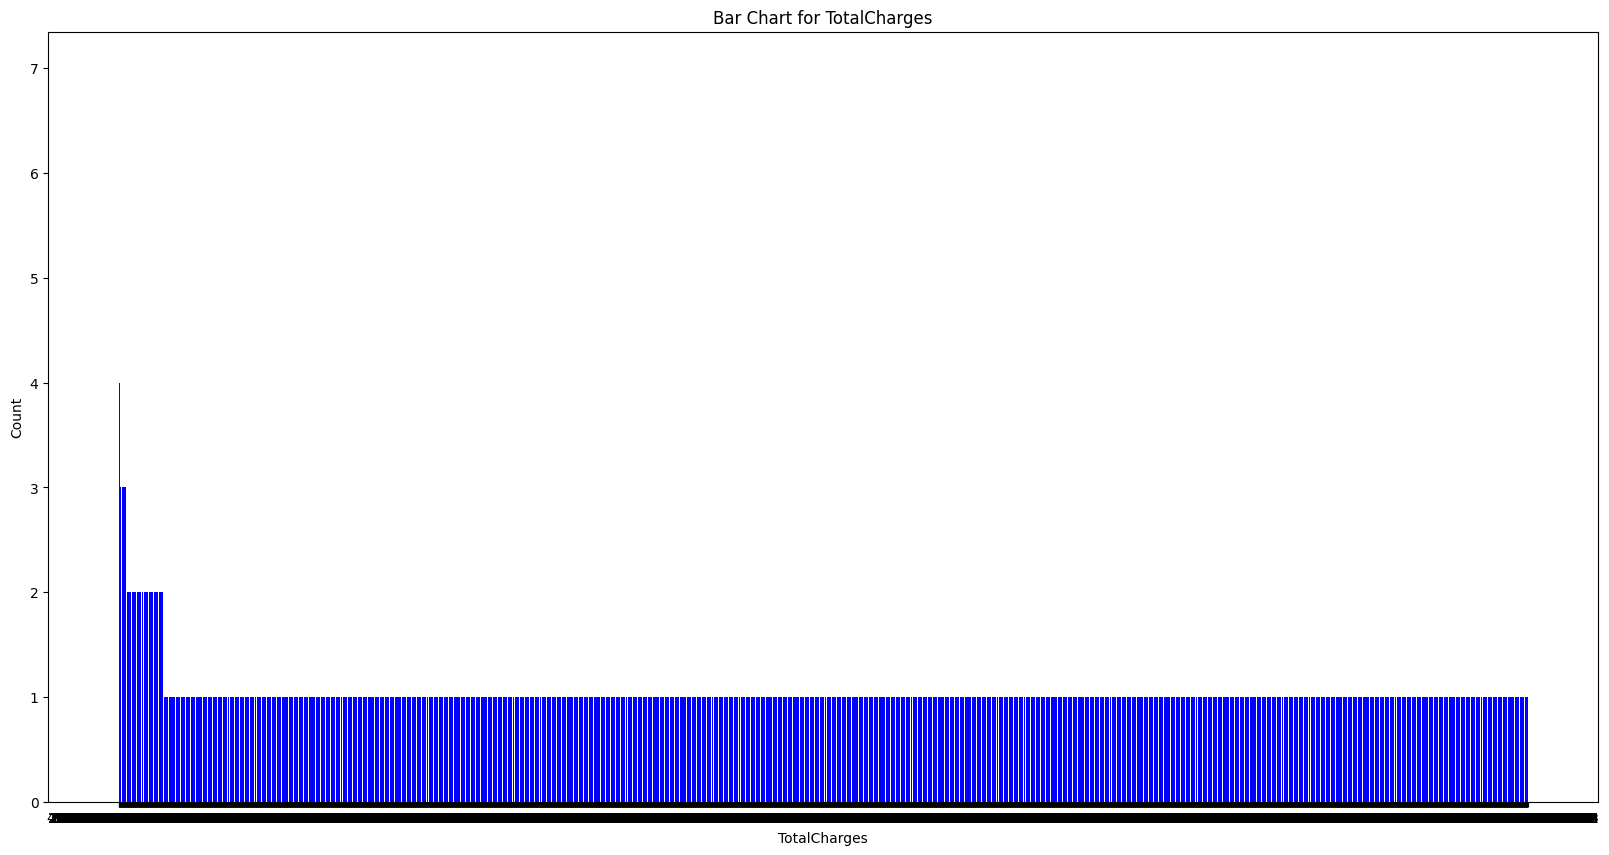

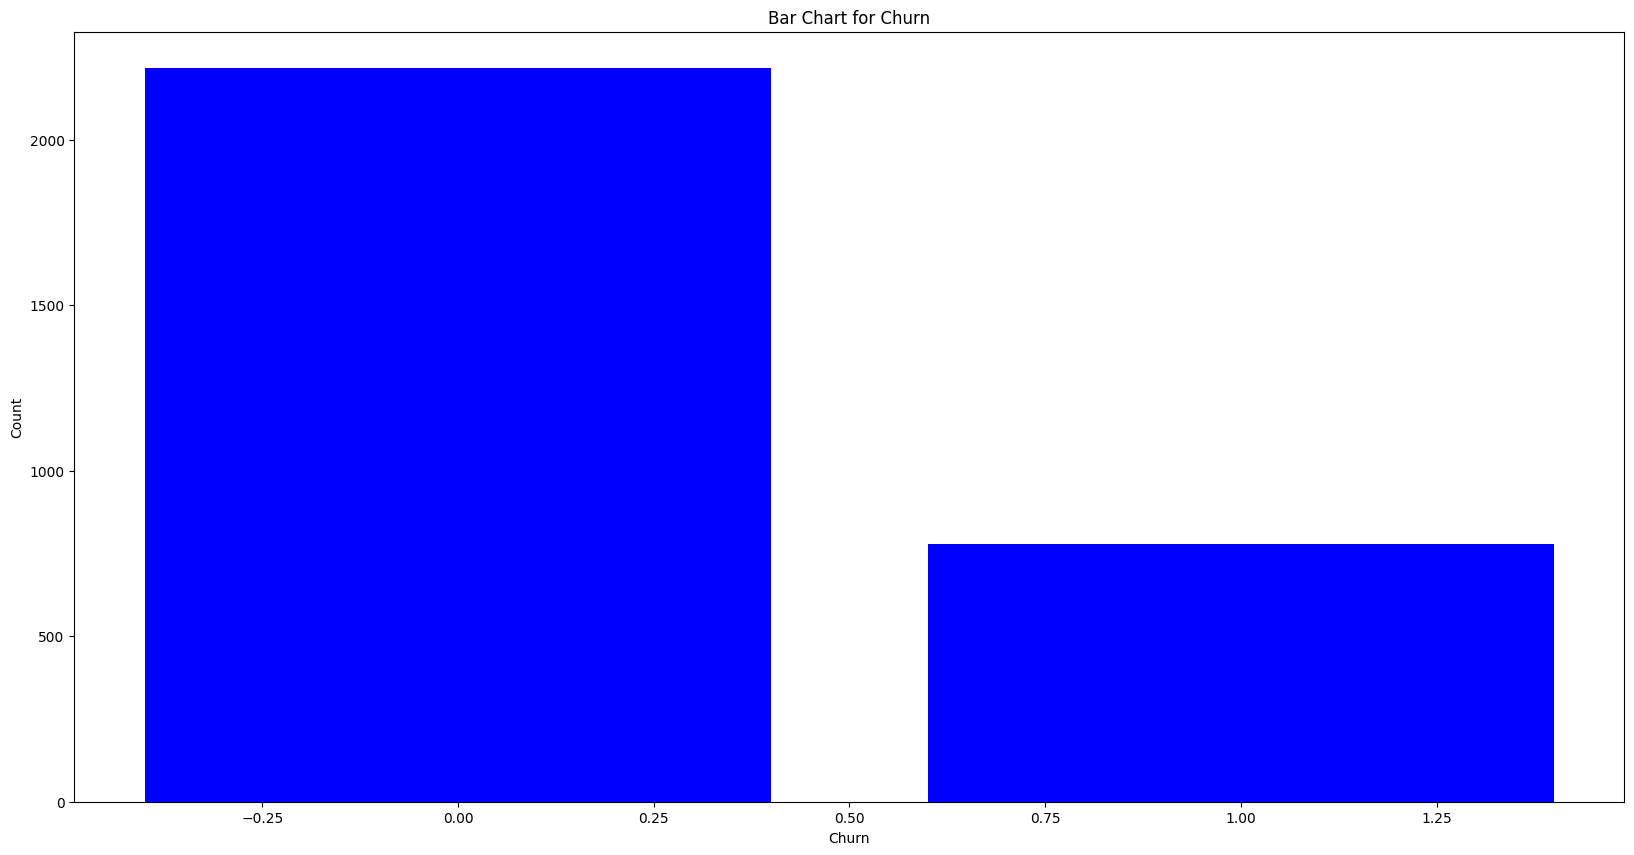

In [48]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
for column in df.columns:
    # Plotting the bar chart for each column
    plt.figure(figsize=(20, 10))
    plt.bar(df[column].value_counts().index, df[column].value_counts(), color='blue')

    # Adding labels and title
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Bar Chart for {column}')

    # Display the chart
    plt.show()

## Data Cleaning

Replace True with Yes and False with No

In [49]:
df.replace({'True': 'Yes'}, inplace=True)


In [50]:
df.replace({'False': 'Yes'}, inplace=True)

In [51]:
df.replace({'No internet service': 'Yes'}, inplace=True)

In [52]:
# Calculate the mode of the column
mode_value = df['MultipleLines'].mode()[0]

# Replace NaN values with the mode
df['MultipleLines'].fillna(mode_value, inplace=True)

## Data Preparation


Split data into input(X) and target(y) features


In [53]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,Yes,1,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,29.850000,29.85000038146973,0.0
1,Male,0,Yes,Yes,34,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,56.950001,1889.5,0.0
2,Male,0,Yes,Yes,2,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,53.849998,108.1500015258789,1.0
3,Male,0,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),42.299999,1840.75,0.0
4,Female,0,Yes,Yes,2,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,70.699997,151.6499938964844,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.100000,552.95,NaN
4996,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.050000,3496.3,NaN
4997,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.700000,93.7,NaN
4998,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.750000,7053.35,NaN


In [54]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,Yes,1,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,29.850000,29.85000038146973,0.0
1,Male,0,Yes,Yes,34,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,56.950001,1889.5,0.0
2,Male,0,Yes,Yes,2,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,53.849998,108.1500015258789,1.0
3,Male,0,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),42.299999,1840.75,0.0
4,Female,0,Yes,Yes,2,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,70.699997,151.6499938964844,1.0


Replacing NaN values with median for Churn

In [55]:
Churn2 = df['Churn'].mode().iloc[0]  # Access the first element (mode)
df['Churn'].fillna(Churn2, inplace=True)


In [56]:
## Churn2 = df['Churn'].mode()

### df['Churn'].fillna(Churn2, inplace=True) ####

In [57]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,Yes,1,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,29.850000,29.85000038146973,0.0
1,Male,0,Yes,Yes,34,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,56.950001,1889.5,0.0
2,Male,0,Yes,Yes,2,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,53.849998,108.1500015258789,1.0
3,Male,0,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),42.299999,1840.75,0.0
4,Female,0,Yes,Yes,2,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,70.699997,151.6499938964844,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.100000,552.95,0.0
4996,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.050000,3496.3,0.0
4997,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.700000,93.7,0.0
4998,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.750000,7053.35,0.0


In [58]:
y = df['Churn']

## Split data into training and evaluation

In [59]:
# separating the target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

In [61]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [62]:
# Dataframe for X_train
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2085,Female,1,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,93.199997,2931
677,Female,0,Yes,Yes,2,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,34.700001,62.25
1257,Female,1,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,34.200001,1596.599975585938
3143,Male,0,Yes,Yes,13,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,72.800000,930.05
4566,Male,0,Yes,No,68,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.300000,6754.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,Male,0,Yes,Yes,29,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,35.599998,1072.599975585938
132,Male,0,Yes,Yes,67,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),50.549999,3260.10009765625
3629,Male,0,Yes,Yes,17,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,25.150000,412.6
3541,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.650000,2070.75


In [63]:
# Dataframe for X_test
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
324,Male,0,Yes,Yes,69,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),60.049999,4176.7001953125
300,Male,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),64.900002,1509.800048828125
617,Female,1,Yes,Yes,66,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),102.849998,6976.75
2434,Female,0,Yes,Yes,3,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,Yes,Mailed check,19.650000,60.65000152587891
4511,Male,0,No,Yes,17,Yes,No,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,80.850000,1445.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,Male,0,Yes,Yes,1,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,59.849998,59.84999847412109
1175,Female,0,Yes,Yes,13,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),80.000000,1029.349975585938
2652,Male,0,Yes,Yes,1,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,55.549999,55.54999923706055
4107,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,Two year,Yes,Credit card (automatic),94.450000,6921.7


In [64]:
# dataframe for y_train (Churn)
y_train

2085    1.0
677     1.0
1257    0.0
3143    0.0
4566    0.0
       ... 
1146    0.0
132     0.0
3629    0.0
3541    0.0
3665    0.0
Name: Churn, Length: 3992, dtype: float64

In [65]:
# dataframe for y_test (Churn)
y_test

324     0.0
300     0.0
617     0.0
2434    0.0
4511    0.0
       ... 
1730    1.0
1175    0.0
2652    0.0
4107    0.0
907     0.0
Name: Churn, Length: 998, dtype: float64

In [66]:
# variable types in dataframe
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn               float64
dtype: object

## Feature Enginnering

In [68]:
# x dataframe information
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4990 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4990 non-null   object 
 1   SeniorCitizen     4990 non-null   int64  
 2   Partner           4990 non-null   object 
 3   Dependents        4990 non-null   object 
 4   tenure            4990 non-null   int64  
 5   PhoneService      4990 non-null   object 
 6   MultipleLines     4990 non-null   object 
 7   InternetService   4990 non-null   object 
 8   OnlineSecurity    4344 non-null   object 
 9   OnlineBackup      4344 non-null   object 
 10  DeviceProtection  4344 non-null   object 
 11  TechSupport       4344 non-null   object 
 12  StreamingTV       4344 non-null   object 
 13  StreamingMovies   4344 non-null   object 
 14  Contract          4990 non-null   object 
 15  PaperlessBilling  4990 non-null   object 
 16  PaymentMethod     4990 non-null   object 
 17  

In [69]:
# Calling out numeric data in X 
numeric_column = X.select_dtypes(include='number').columns
numeric_column

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [70]:
# Calling out categorical data in X
categorical_column = X.select_dtypes(include='object').columns
categorical_column

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

## Pipelines

In [71]:

numeric_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
])

# Apply OneHotEncoder to each categorical column
categorical_transformers = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(transformers=[
    ('numerical_pipeline', numeric_pipeline, numeric_column),
    ('categorical_pipeline', categorical_transformers, categorical_column),
])


Label Encoding

In [72]:

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)





Decision Tree Pipleline

In [74]:

decision_tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
    ])

decision_tree_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

## Classification 

# Precision: is the ratio of correctly predicted positive observations to the total predicted positives.

# Recall : the ratio of correctly predicted positive observations to all observations in the actual class

## Model 1

Decision_Tree classifier

In [75]:
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=categorical_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       843
           1       0.18      0.16      0.17       155

    accuracy                           0.76       998
   macro avg       0.51      0.51      0.51       998
weighted avg       0.75      0.76      0.75       998



# In summary, while the accuracy is relatively high
# precision and recall for class 0 (Churn = No)
# the precision and recall for class 1 (Churn = Yes) are lower, indicating potential challenges in correctly predicting instances of class 1. 

## Model 2

Random Forest Classifier

In [81]:
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Identify numeric columns
numeric_columns = X.select_dtypes(include=['number']).columns

# Create preprocessor for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier pipeline
Random_Forest_Classifier_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline to your training data
Random_Forest_Classifier_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [82]:
# Assuming you have already encoded your target variable y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
random_forest.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       843
           1       0.14      0.11      0.12       155

    accuracy                           0.76       998
   macro avg       0.49      0.49      0.49       998
weighted avg       0.73      0.76      0.74       998



# In summary, while the accuracy is relatively high
# precision and recall for class 0 (Churn = No) is high (0.84)
# the precision and recall for class 1 (Churn = Yes) are lower (0.14), indicating potential challenges in correctly predicting instances of class 1. 

## Model 3

Support Vector Machines (SVM)

In [84]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline


# Create an SVM Classifier pipeline
SVM_Classifier_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', random_state=42))  # You can choose different kernels like 'linear', 'rbf', etc.
])

# Fit the pipeline to your training data
SVM_Classifier_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index([], dtype='object'))])),
                ('classifier', SVC(kernel='linear', random_state=42))])

In [85]:
# Assuming you have your features in X and labels in y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical labels if needed
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create an SVM classifier
svm_classifier = svm.SVC(kernel='linear', C=1.0)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       838
           1       0.67      0.60      0.63       160

    accuracy                           0.89       998
   macro avg       0.80      0.77      0.78       998
weighted avg       0.88      0.89      0.89       998



# Overall Accuracy = 0.89
# In summary, the model appears to perform well, with high precision (0.93), recall (0.94), and F1-score for class (0.93) for class 0 (Churn = No)
# moderate performance for class 1 (Churn = Yes)
# further analyze the misclassifications or explore techniques to improve the model, for class 1 (Churn = Yes), if necessary.

## Model 4

Linear Discriminant Analysis (LDA)

In [ ]:
# Assuming you have a feature matrix X and labels y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LDA instance
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
lda.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lda.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.58      0.70       838
           1       0.21      0.57      0.30       160

    accuracy                           0.58       998
   macro avg       0.54      0.57      0.50       998
weighted avg       0.77      0.58      0.64       998



# In summary, the model has a higher precision for class 0 but lower precision for class 1. 
# The recall is relatively balanced between the two classes. 
# The F1-Score, which combines precision and recall, is higher for class 0 (Churn = No) compared to class 1 (Churn = Yes)